# I. Abstract (3 points)

# II. Project and Data Overview (3 points)

## A. Project Overview (1 points)
• Clear definition of the problem and its significance.

• Overview of the dataset and its relevance to the problem.

This project focuses on the prediction of daily new COVID-19 cases in ten European countries. Accurately predicting new cases will allow governments and health organizations to better prepare for and respond to the evolving situation. I will also make comments on understanding of the pandemic's trend, public health policies, and resource allocation. The dataset used is a comprehensive collection of global country-level COVID-19-related data, starting from January 1, 2020, to September 20, 2023. It includes critical variables such as new_cases, new_deaths, and new_vaccinations, which are essential for future predictions. I will conduct country-level analysis to identify regional trends, areas with rising case numbers, and the effectiveness of local health measures, such as lockdowns. 

## B. Data Overview and Preprocessing (2 point)

The dataset in use consists of 67 variables spread across 200 countries, with a total of 342,947 observations over 1359 days (from January 1, 2020, to September 20, 2023).  For this project, the focus was narrowed to European countries, reducing the dataset to 66,493 observations. This subset was further refined by:
1. Filtering countries that reported data daily. Some countries like France reported weekly.
2. Excluding countries with more than 40% missing values in certain features.
3. Adjusting the observation period to focus on data from March 21st, 2020 to January 14th, 2023, due to reduced public attention and data reliability after that.

Test-Train Split

Train set contained data from March 21st, 2020 to December 31st, 2022. Test set contained data from January 1st, 2023 to January 14th, 2023. The split was done to prevents data leakage and accurately reflects the temporal nature of the data. 

Handling Missing Values

There were no missing values in the target variable, new_cases. Only Lithuania had five missing values in the 'reproduction_rate', which were filled with zeros. Poland did not have data for new_tests; other countries are missing ~20% data for new_tests. 
In Poland, the absence of 'new_tests' data was noted, and similar gaps were identified in other countries.

Addressing Multicollinearity

I used  Pearson and Spearman correaltion matrix to determine multicollinearity. Variables containing 'per_hundred|per_thousand|per_million|total|smoothed' had high level of multicollinearity. positive_rate and tests_per_case were highly correlated with new_tests, cardiovasc_rate with human_development_index and life_expectancy, median_age and aged_65_older with aged_70_older, gdp_per_capita and extreme_poverty with human_development_index. Correlations were narrowed to between 0.4 and -0.4 to improve model performance and interpretability.

Feature Engineering

New features were created to capture country-specific elements like holidays with considerations for incubation periods and national lockdowns.
Temporal features like day of the week, weekend, month, year, quarter, day of the year, day of the month, and week of the year were also included. This is particularly helpful for models that struggle with capturing seasonality. There were high number of new_cases in December, January, and July. Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) analyses were used to identify and create lag features. Lag features included 1day, 7day, and 8day. rolling window 7-day and 14-day were also included.

Stationarity

The Augmented Dickey-Fuller (ADF) test was employed to check for stationarity in the time series data. Countries with stationary data (p<0.05) include Lithunia and Poland. Belgium, Denmark, Finland, Ireland, Italy, Norway, Switzerland, and United Kingdom have non-stationary data. This is particularly useful for developing ARIMA models. 

EDA 

new_cases had left skewed distribution for all countries. I will apoply transformation methods for important for models that assume normality. esuggests that 'new_tests', 'new_deaths', and 'reproduction_rate' are significant predictors for your model. This makes sense as these variables are directly related to the COVID trends. 'New_deaths' can be a lagging indicator of the severity of the pandemic. Features like 'population_density' and 'aged_70_older' are constants for each country and don't vary over time. While these features may not have predictive power for the time series aspect of the model, they are important for understanding cross-sectional differences between countries. For example, economic factors like GDP per capita and poverty rates can affect how a country experiences and responds to the pandemic. 

 

# III. Methodology (21 points)

## A. ARIMA Model (4 points)

1. Data Preparation:
• Describe the specific dataset preparation steps for the ARIMA model.
• Show your dataset is stationary, since stationarity is a key assumption for ARIMA
models to perform effectively.
• Concisely describe the ARIMA model's key parameters.
• Explain any transformations or adjustments made to the data for compatibility with
the ARIMA model.
2. Model Building:
• Explain the training process for the ARIMA model.
• Concisely describe the ARIMA model's key parameters tuning and its final parameter
values.
• Discuss challenges faced during the training phase and their resolutions.
3. Model Performance
                            
• Evaluate the ARIMA model using your chosen performance metrics and data visualization techniques.

### Data Prepation
The dataset was narrowed down to only use 'date' and 'new_cases' as ARIMA only takes in the target variable. Confirmed there are no missing values in 'new_cases', which is critical since ARIMA models are sensitive to gaps in data. Outliers in 'new_cases' were capped at an upper bound. This minimizes the impact of extreme peaks on the model, which can lead to misleading forecasts. Using the Augmented Dickey-Fuller (ADF) test, I found that data for Lithuania and Poland were already stationary (p < 0.05), while other countries like Belgium, Denmark, Finland, Ireland, Italy, Norway, Switzerland, and the United Kingdom were not. I then applied first-order differencing to the non-stationary series, which subtracting new_cases from the previous value. I then confirmed that all country datasets became stationary using the ADF test.

### Model Building 

The values for p and q were initially chosen based on ACF and PACF plots. The value for d depended on the staionarity of country data. The manually tuned model was iteratively fit to the training data, adjusting parameters to minimize RMSE with considerations for bias-variance trade-off. I used RMSE because it is easy to interpret and penalizes large values. This aligns with my goal to minimize large forecast errors and capture key trends for policy decisions. With a narrower range, I then used grid search to find the best combination of p, d, and q. 

I trained a model for one country with stationary data and another with non-stationary data and then applied these parameters to other countries. For non-stationary data, I trained a model for Italy. The ACF shows a gradual decline, indicating a higher order of autoregression I started with p=3 and q=2 as the PACF cuts off after the first lag. As shown early, I set d=1 to resolve non-stationarity. The parameters for the best manually tuned model were (5, 1, 3), achieving Train RMSE: 6715.849476466177 and Test RMSE: 9813.377705564164. I then applied grid search with p = q = range(0, 6) and d = range(0, 2). The best model (5, 1, 4) achieved Train RMSE: 5868.791519987361 and Test RMSE: 10262.971374974883. The model achieved optimal AIC but did not achieve a better test performance. For stationary data, I trained a model for Poland. While the data was stationary, the parameters for the best manually tuned model were (5, 1, 3), achieving Train RMSE: 1384.381171955456 and Test RMSE: 194.16454700027893. The grid search result was again (5, 1, 4), achieving Train RMSE: 1565.3984550729565 and Test RMSE: 253.39195151024703. I ended up applying (5, 1, 4) to all countries. 

One challenge was overfitting, as indicated by the increase in Test RMSE despite a lower Train RMSE and optimal AIC for Italy. The model captures noise in the training data that does not generalize well to unseen data. I then reduced the number of parameters by q to 3. 

### Model Performance (see Apendix)
Looking at train performance, the model captures the general movement but does not appear to capture the highest peaks very accurately. This may often average out the most extreme values. In terms of test performance, Model performed relatively stronger for Italy, Poland, and Lithuania but did not capture trend for other countries. The parameters (p, d, q) that work for one country might not be suitable for another. This might be due to overfitting the model to the training data, which doesn't generalize well to other datasets. Since ARIMA is fundamentally a linear model, it may not capture complex nonlinear patterns without transformations or additional seasonal differencing. I would expect to see better performance in Auto ARIMA. 

## B. Auto_ARIMA Model (3 points)

1. Data Preparation:
• Describe the specific dataset preparation steps for the Auto_ARIMA model.
• Concisely describe the Auto-ARIMA model's key parameters and its difference
against ARIMA
• Explain any transformations or adjustments made to the data for compatibility with
the Auto_ARIMA model.
2. Model Building:
• Explain the training process for the Auto_ARIMA model.
• Discuss challenges faced during the training phase and their resolutions.
• Concisely describe the ARIMA model's key parameters tuning and its final parameter
values.
3. Model Performance:
• Evaluate the Auto-ARIMA model using your chosen performance metrics and data visualization techniques.
• Compare it with the best performance of ARIMA model that you built above.
• Try to explain the difference.

### Data Preparation

I adopted the same data preparation steps for the Auto_ARIMA model as ARIMA and built my model on insights from ARIMA. In addition to p,d,q, Auto_ARIMA can incorporate seasonal terms P, D, and Q, which represent the seasonal aspects of the model, and m, which is the number of periods in each season. Auto_ARIMA conducts a search over specified ranges of model parameters, including p, d, q (and P, D, Q, m for seasonal data), to find the best fit based on AIC. However, due to computational intensity, I set D=1. The model for Italy had optimal AIC with (5, 1, 2)  (2, 1, 0, 12) . It uses using two seasonal lags with a period of 12, which can account for incubation period. It also does not use past seasonal forecast errors in predicting future values. The data for each country was differenced once to achieve stationarity and once again for seasonal differences. 

### Model Building and Performance
The ARIMA model with best performance was for Poland with parameters (5,1,3) with train rmse 1384.381172, and test rmse 194.164547. The Auto-ARIMA model had (5, 1, 4)  (2, 1, 0, 12), train rmse 1507.809701 and test rmse 302.424495. The manually tuned ARIMA model achieves a lower RMSE on both the training and test sets, suggesting it generalizes better to unseen data. It could have been that the seasonal pattern is not strong or consistent year-over-year, and thus inlcuding seasonal parameters led to overfitting.

## C. Prophet (Univariate) Model (3 points)

2. Data Preparation:
• Articulate the advantages and benefits of using Prophet over models from the ARIMA
family. Concisely describe the architecture and key parameters of the Prophet
(univariate) model,
• Describe the specific dataset preparation steps for the Prophet (univariate) model.
• Explain any transformations or adjustments made to the data for compatibility with
the Prophet (univariate) model.
3. Model Building:
• Explain the training process for the Prophet (univariate) model.
• Discuss any additional steps you have taken to optimize performance, if applicable
• Concisely describe the Prophet (Univariate) model's key parameters tuning and its
final parameter values.
• Discuss challenges faced during the phase and their resolutions.
4. Model Performance:
• Evaluate the Prophet (univariate) model using your chosen performance metrics and
data visualization techniques.

Compared to the ARIMA family, Prophet can handle multiple seasonality patterns, including yearly, weekly, and daily seasonality. It can also automatically detects change points in the trends, allowing for more flexibility in capturing shifts in the trend. Lastly, it is robust to missing values.

Key parameters included: 
1. growth: 'linear' or 'logistic' to specify the trend flexibility
2. holidays: a dataframe containing holiday dates
3. holidays_prior_scale: controls the flexibility around holiday effects
4. seasonality_prior_scale: controls the strength of the seasonality model
5. changepoint_prior_scale: controls the flexibility of the automatic changepoint selection in the trend component of the model
6. seasonality_mode: An 'additive' model assumes that seasonal effects are the same regardless of the level of the time series, while a 'multiplicative' model assumes that seasonal effects increase proportionally with the time series.
7. changepoint_range: controls the range for which the changepoints are infered. the default value is 0.8, which means  changepoints are only inferred for the first 80% of the time series. This leaves plenty of runway for projecting the trend forward and avoids overfitting fluctuations at the end of the time series.

I first tried developing a model using logistic growth. This is because COVID, rather than increasing infinitely, has a carrying capacity. When forecasting its growth, there is usually some maximum achievable point and the forecast should saturate at this point. For data preparation, I convert the dataset into a two-column format with data and new_cases, which were later renamed as 'ds' and 'y' for model development. I also created a holiday dataframe for each country, including national lockdowns and holidays with a ds_upper of 7 days to account for long incubation period. For outliers, I used the make_future_dataframe function to visualize future trends. The effect of the extreme outliers in 2021 reverberated into the future, shown with the spike on the righ end of the graph. Therefore I tried to set outliers as upper bound of IQR and as NA since Prophet can handle missing values. It turned out that setting missing values to NA had a significant improvement on the performance.
![Alt text](image-8.png)

There was a strong overall and yearly upward trend that lead to model to overestimate number of new cases in test set. For model development, I tried tuning the maximum capacity in order to account for the fact that the population has largely achieved herd population with COVID and thus should not be expecting a surge in cases on a large scale. The cap could not achieve bias variance tradeoff, as shown below. The test rmse was lowered to 5133.39, but the train rmse was significantly sacrificed. I decided to not generalize this model to other countries and to take a different approach.   
![ ](image-9.png) ![ ](image-10.png)![ ](image-11.png)



Since logistic growth did not perform well, I developed a different model by taking log transformation of the target vairable y. This helps to stabilize the variance overtime and mitigate the impact of outliers. I filled the 5 -inf values from transformation to avoid error. Some time series may have multiplicative components (seasonal variations that scale with the value of the variable), and a log transformation can convert the series into an additive model. After manually tuning the parameters mentioned early, I tried optimizing performance using grid search with cross validation (horizon = '14 days', period = '100 days', initial = '365 days'). However, this did not resolve the issue of overfitting. 
The best model parameters were Prophet(
            holidays=holiday_italy,
            holidays_prior_scale = 0.1,
            seasonality_prior_scale = 1,
            changepoint_prior_scale = 0.05,
            seasonality_mode = 'additive'
             ), achieving train RMSE: 19991.57 and test RMSE 17571.55. The model had moderate flexibility in seasonality and small holiday effects. I then applied the model parameters to other countries (see Apendix). The model overestimated the values in most of the countries. 
 

## D. Prophet (Multivariate) Model (3 points)

1. Data Preparation:
• Describe the specific dataset preparation steps for the Prophet (multivariate) model, such as the choice of significant predictors.
• Explain any transformations or adjustments made to the data for compatibility with the Prophet (multivariate) model.
2. Model Building:
• Explain the training process for the Prophet (multivariate) model.
• Discuss any additional steps you have taken to optimize performance, if applicable
• Concisely describe the Prophet (Univariate) model's key parameters tuning and its
final parameter values.
• Discuss challenges faced during the training phase and their resolutions.
3. Model Performance
• Evaluate the Prophet (Multivariate) model using your chosen performance metrics
and data visualization techniques.
• Compare the performance of the Prophet (multivariate) model with Prophet
(univariate) model, try to explain the difference.

## E. XGBoost Model (4 points)

1. Data Preparation:
• Describe the specific dataset preparation steps for the XGBoost model.
• Explain any transformations or adjustments made to the data for compatibility with
the XGBoost model.
• List the predictors you used for building your XGBoost model
2. Model Building:
• Provide a clear overview of the XGBoost model.
• Concisely describe the XGBoost model's key parameters.
• Explain the training process for the XGBoost model.
• Concisely describe the XGBoost model's key parameters tuning and its final
parameter values.
• Discuss challenges faced during the training phase and their resolutions.
3. Model Performance
• Evaluate the XGBoost model using your chosen performance metrics and data
visualization techniques.

## F. LSTM Model (4 points)

1. Data Preparation:
• Describe the specific dataset preparation steps for the LSTM model.
• Explain any transformations or adjustments made to the data for compatibility with
the LSTM model.
• List the predictors you used for building your XGBoost model
2. Model Building:
• Concisely describe the LSTM model's key parameters.
• Explain the training process for the LSTM model and how did you tune the key
parameters.                      
• Description of how model was adapted and modified for improvement if applicable.
• Discuss challenges faced during the training phase and their resolutions.
3. Model Performance
• Evaluate the LSTM model using your chosen performance metrics and data visualization techniques.

### Data Preparation
To start with, columns including population_density, diabetes_prevalence, female_smokers, life_expectancy, human_development_index, aged_70_older, and population are dropped since they are constants and may not have any predictive power. Then, the date column is converted from string format to datetime objects and then to ordinal format. This makes the dates numeric and suitable for model training. Similarly, the season column, initially in string format, is converted to numerical values using a dictionary mapping. Then, to normalize data, RobustScaler from sklearn.preprocessing is used for scaling features. The data is grouped by location, and scaling is applied to each group separately, except for the location column. Finally, a custom function make_series is defined to transform the data into a format suitable for time series forecasting with an LSTM.
For each point in time, a 14-day window of data is created, capturing the features up to that day. The target variable (new_cases) is also included. This process results in a series of tuples containing the index, the value of new_cases, and the corresponding feature set.

### Model Building
Key parameters:
1. number of LSTM units: The number of units in the LSTM layer, with 32 and 64 units being evaluated. More units can provide higher model complexity.
2. batch_size: The number of samples to use for each training iteration.
3. epochs: The number of times to iterate over the entire training dataset.
4. optimizer: The optimizer used to update the weights in the model. Adam is used here.
5. learning rate: This controls how much the model's weights are updated during training. 
6. early stopping patience: The number of epochs with no improvement (validation loss) after which training will be stopped.

To find the best set of parameters, we use a grid search over the specified ranges of learning rates, batch sizes, number of LSTM units, and early stopping patience. This exhaustive search explores combinations of parameters to find the best performing model configuration.
For each combination of parameters, a new LSTM model is built with a single LSTM layer and a dense output layer. The model is compiled with the Adam optimizer and Mean Absolute Error (MAE) as the loss function.
The model is trained using the specified number of epochs, batch size, and learning rate, with a validation split of 20% for monitoring performance. Early stopping is employed to halt training if the validation loss does not improve for the specified patience, enhancing efficiency and reducing overfitting.
One challenge was overfitting, as indicated by the increase in Test RMSE despite a lower Train RMSE and optimal AIC for Italy. The model captures noise in the training data that does not generalize well to unseen data. To address this, I tried adding early stopping to halt training if the validation loss does not improve for the specified patience. 

### Model Performance
According to the test visualization, it's clear that the model's predictions follow the trend of the actual data quite closely in many instances, although there are some deviations. For example:
 - In the case of Italy, the predictions capture the overall trend but miss some of the peaks and troughs.
 - For Lithuania, the model fails to predict the sharp spike; this could be due to outliers or events not captured by the model.
 - The Norway graph shows that the model is somewhat effective in capturing the trend, although it smoothens out the peaks and troughs.
 - In the Poland and Switzerland graphs, the model captures the direction of the changes but not the exact values, indicating that the model might benefit from further parameter tuning or additional features that capture more variance.

# IV. Results (5 points)

## A. Model Performance Comparison (3 points)
• Presentation of performance metrics for each model.
• Comparison of results to identify the best-performing model.

## B. Analysis of Results (2 points)
• Analysis of strengths and weaknesses of each model.
• Discussion of factors contributing to the best-performing model.

# V. Discussion (4 points)
• If your models yield unfavorable outcomes, please explain the reasons behind their ineffectiveness or lack of success. Additionally, highlight any significant challenges or issues encountered during the process, if feasible.
• Do you feel that you gain valuable experience, skills, and/or knowledge? If yes, please explain what they were. If not, please explain.
• What are things you liked/disliked about the project and/or work on the project?

could have included mask policies

# VI. Conclusion (2 points)
• Summary of key findings.
• Implications of the collaborative learning process.

# VII. References (1 point)
1. https://s-ai-f.github.io/Time-Series/outlier-detection-in-time-series.html#statistical-based-approaches 
2. https://facebook.github.io/prophet/docs/saturating_forecasts.html 
3. https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average#Choosing_the_order
4. https://github.com/Lizhen0909/ts_purchase_redemption/blob/main/6_keras_lstm.ipynb
5. https://www.kaggle.com/code/prashant111/complete-guide-on-time-series-analysis-in-python 
6. https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/ 
7. https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/
8. https://people.duke.edu/~rnau/411arim3.htm 


# VIII. Appendices (1 point)
• Supplementary materials, code snippets, or additional information supporting the findings.

### ARIMA Performance

/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_mo

(14,)
Belgium - Train RMSE: 1080.7501049498394, Test RMSE: 425.30108158327323


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(14,)
Denmark - Train RMSE: 192.35670708351986, Test RMSE: 568.4224235877685


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/

(14,)
Finland - Train RMSE: 312.45922792843874, Test RMSE: 103.05595485977759


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


(14,)
Ireland - Train RMSE: 322.829136252814, Test RMSE: 253.7969155064136


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/

(14,)
Italy - Train RMSE: 6715.849476466177, Test RMSE: 9813.377705564164
(14,)
Norway - Train RMSE: 102.29934697374175, Test RMSE: 75.52338085449516


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_mo

(14,)
Switzerland - Train RMSE: 710.7159110205971, Test RMSE: 616.6532011569325
(14,)
United Kingdom - Train RMSE: 3507.295820886162, Test RMSE: 2873.14244789601


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/s

(14,)
Poland - Train RMSE: 1384.381171955456, Test RMSE: 194.16454700027893


/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/chanelsun/Library/Python/3.9/lib/python/site-packages/statsmodels/base/m

(14,)
Lithuania - Train RMSE: 271.15744229386956, Test RMSE: 216.8733740300311
                 train_rmse    test_rmse
Belgium         1080.750105   425.301082
Denmark          192.356707   568.422424
Finland          312.459228   103.055955
Ireland          322.829136   253.796916
Italy           6715.849476  9813.377706
Norway           102.299347    75.523381
Switzerland      710.715911   616.653201
United Kingdom  3507.295821  2873.142448
Poland          1384.381172   194.164547
Lithuania        271.157442   216.873374


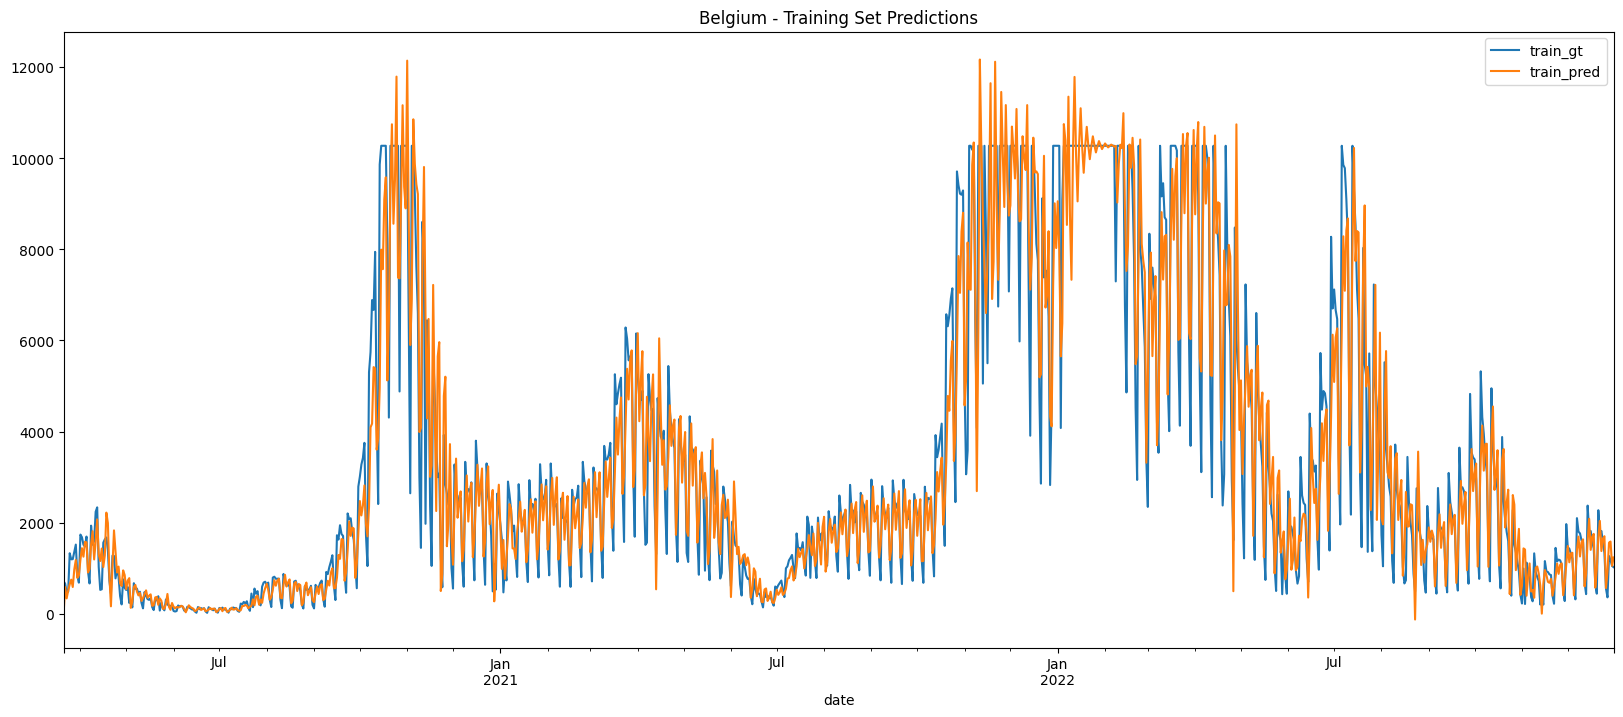

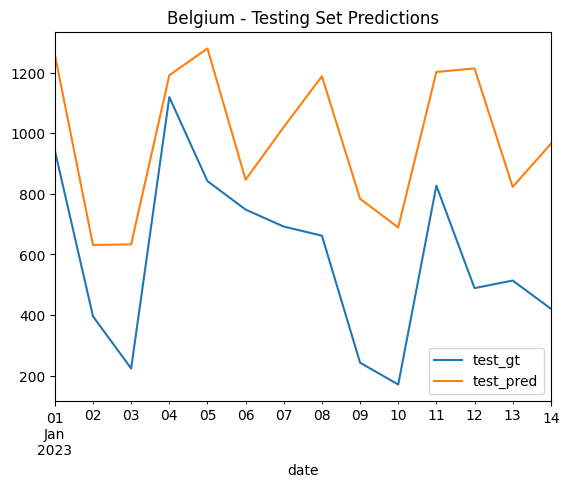

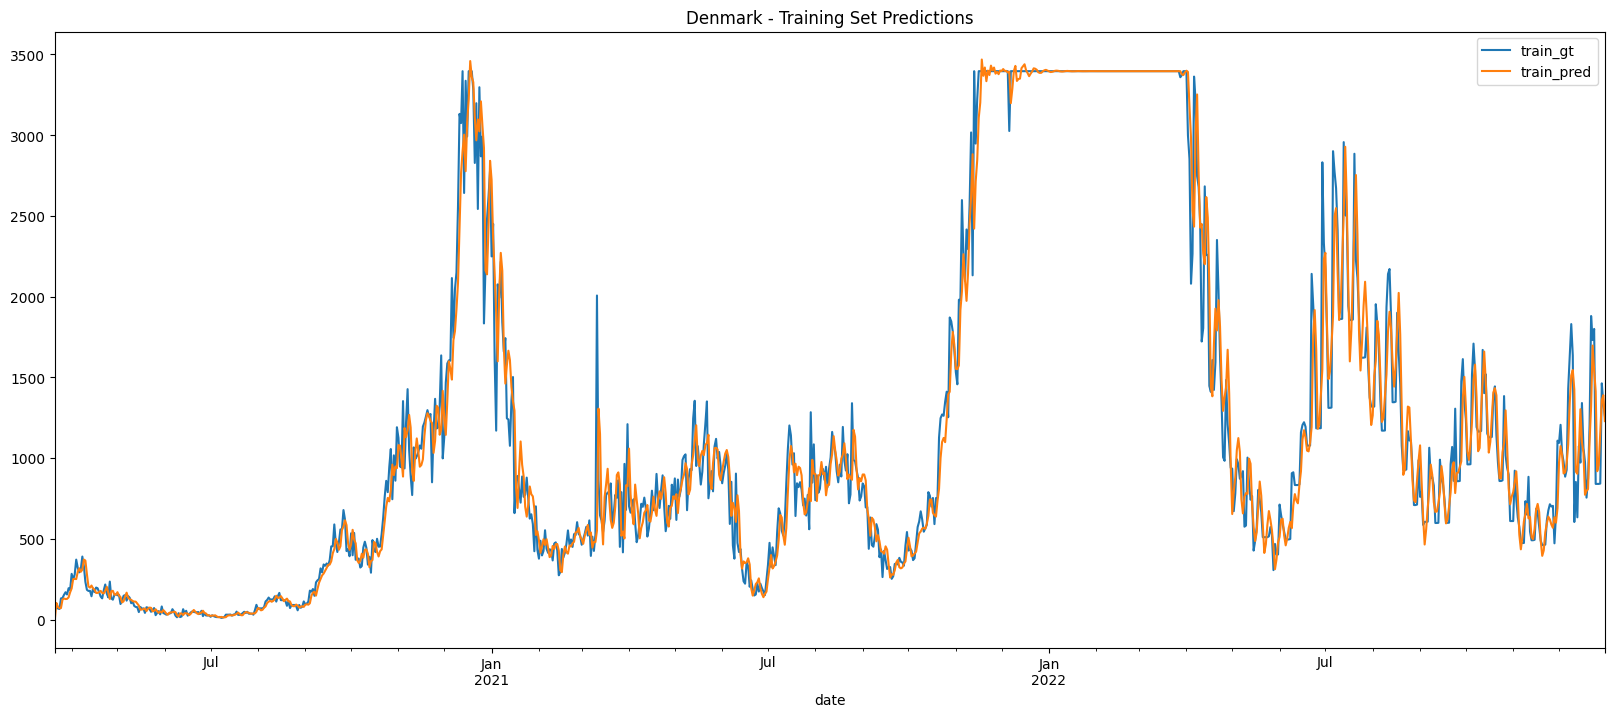

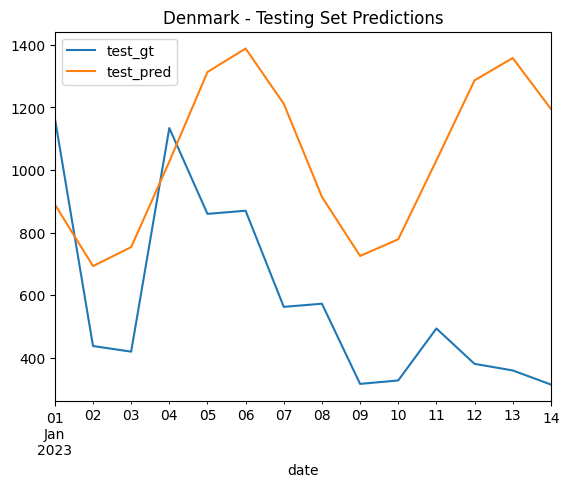

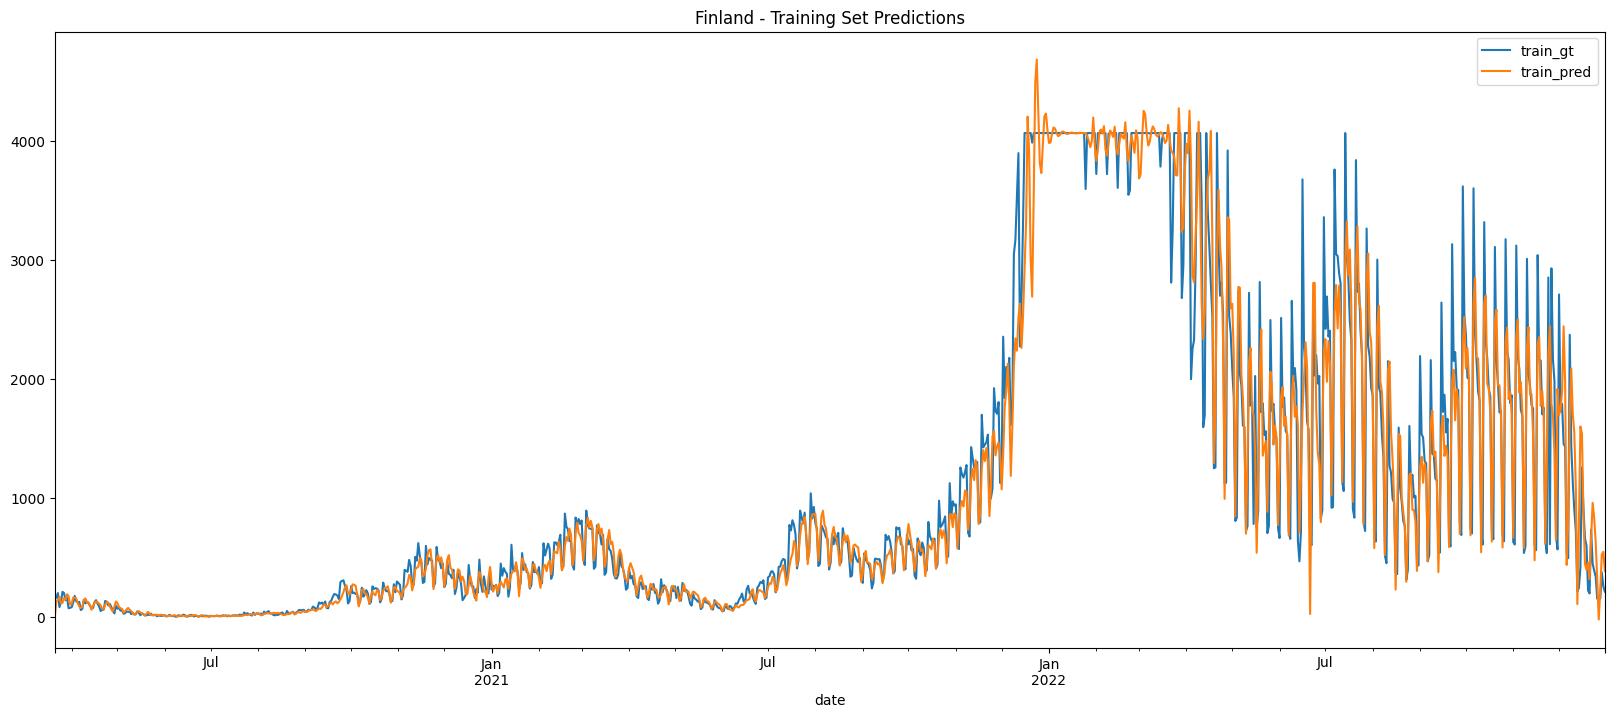

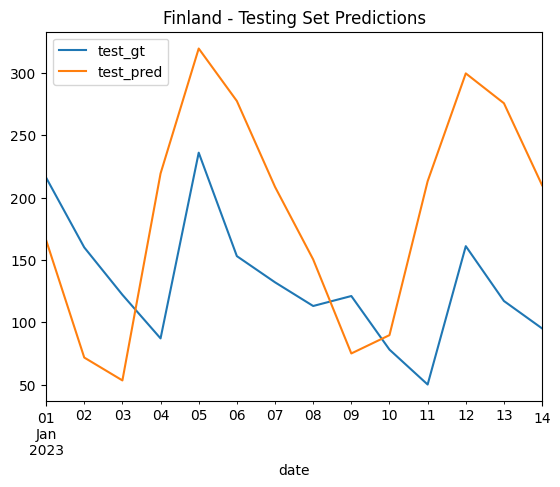

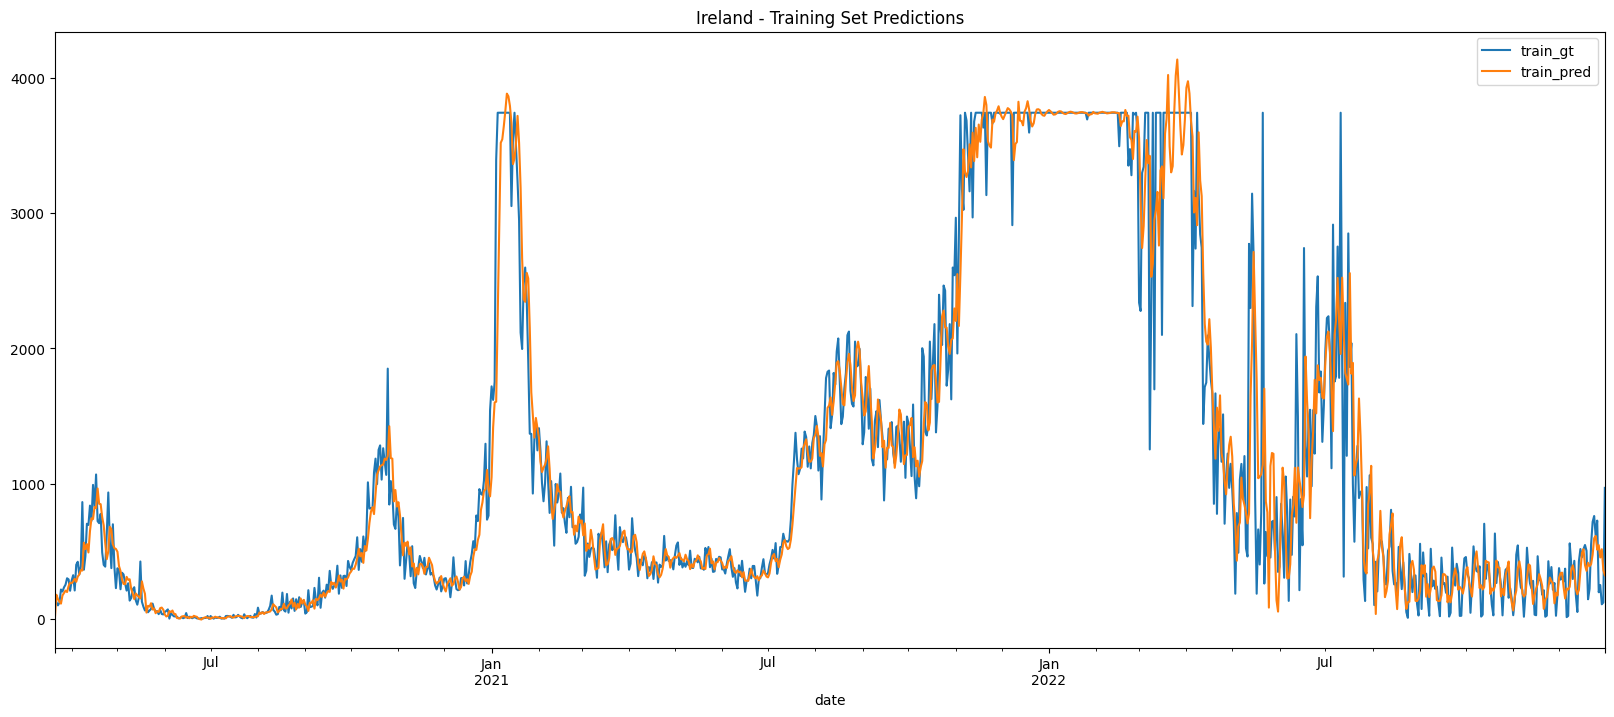

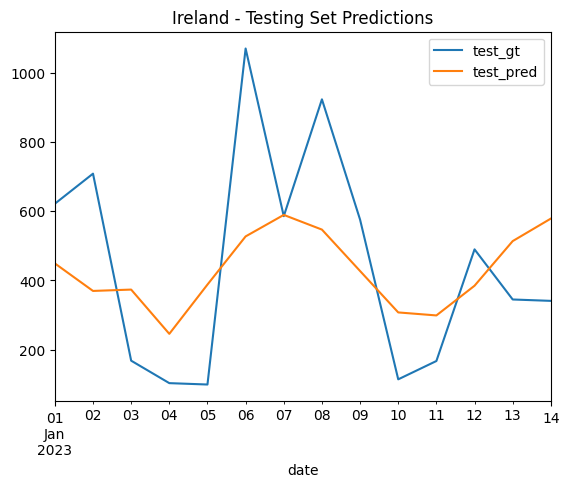

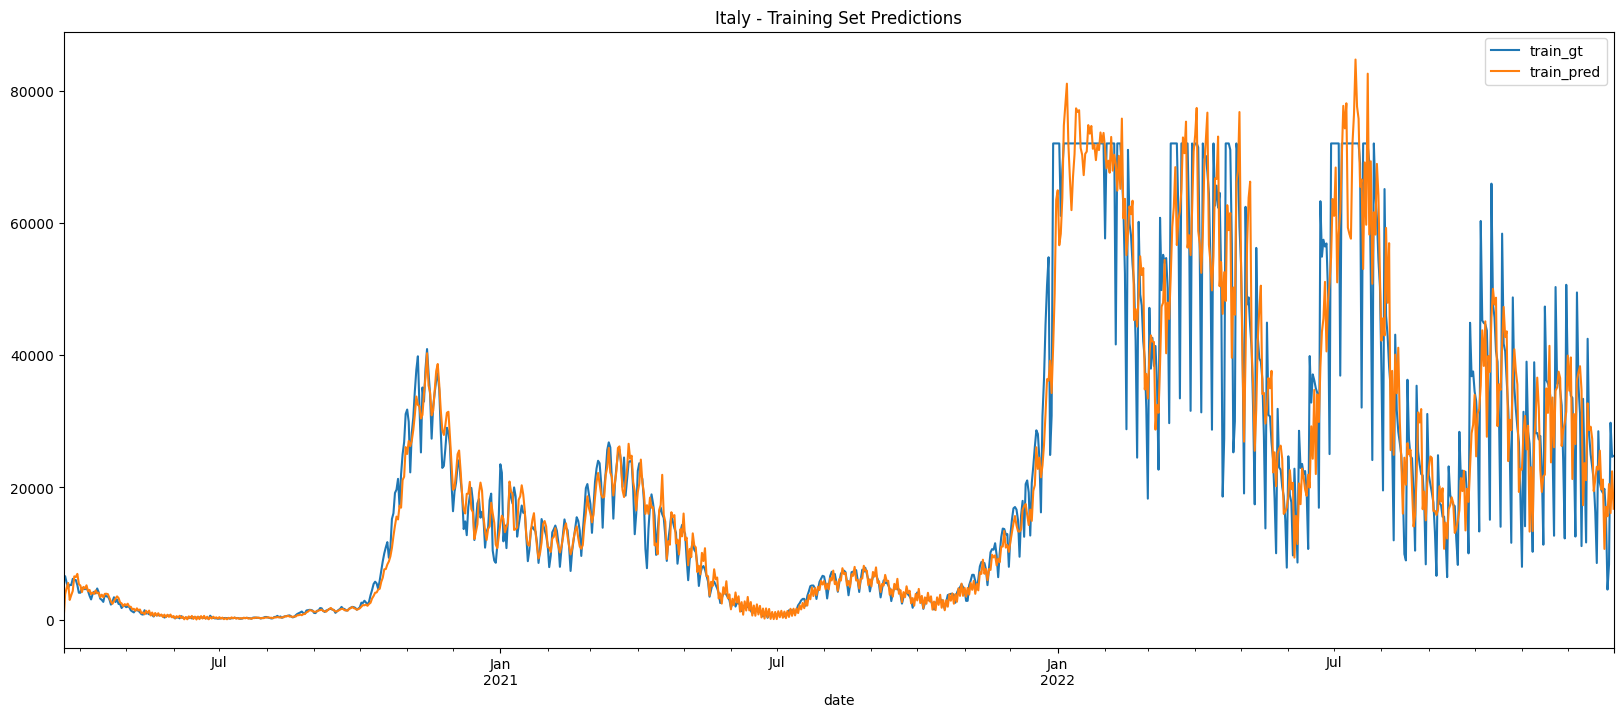

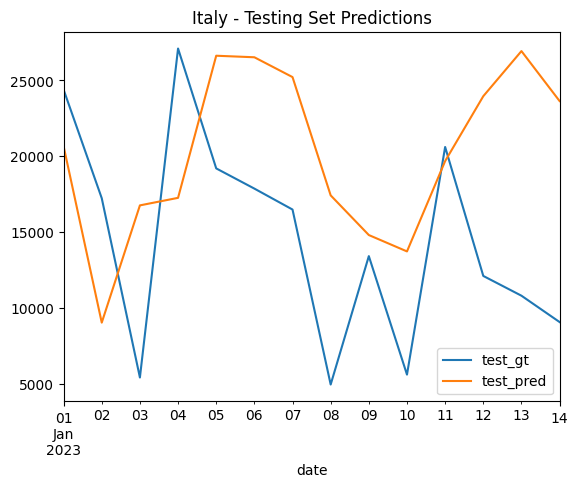

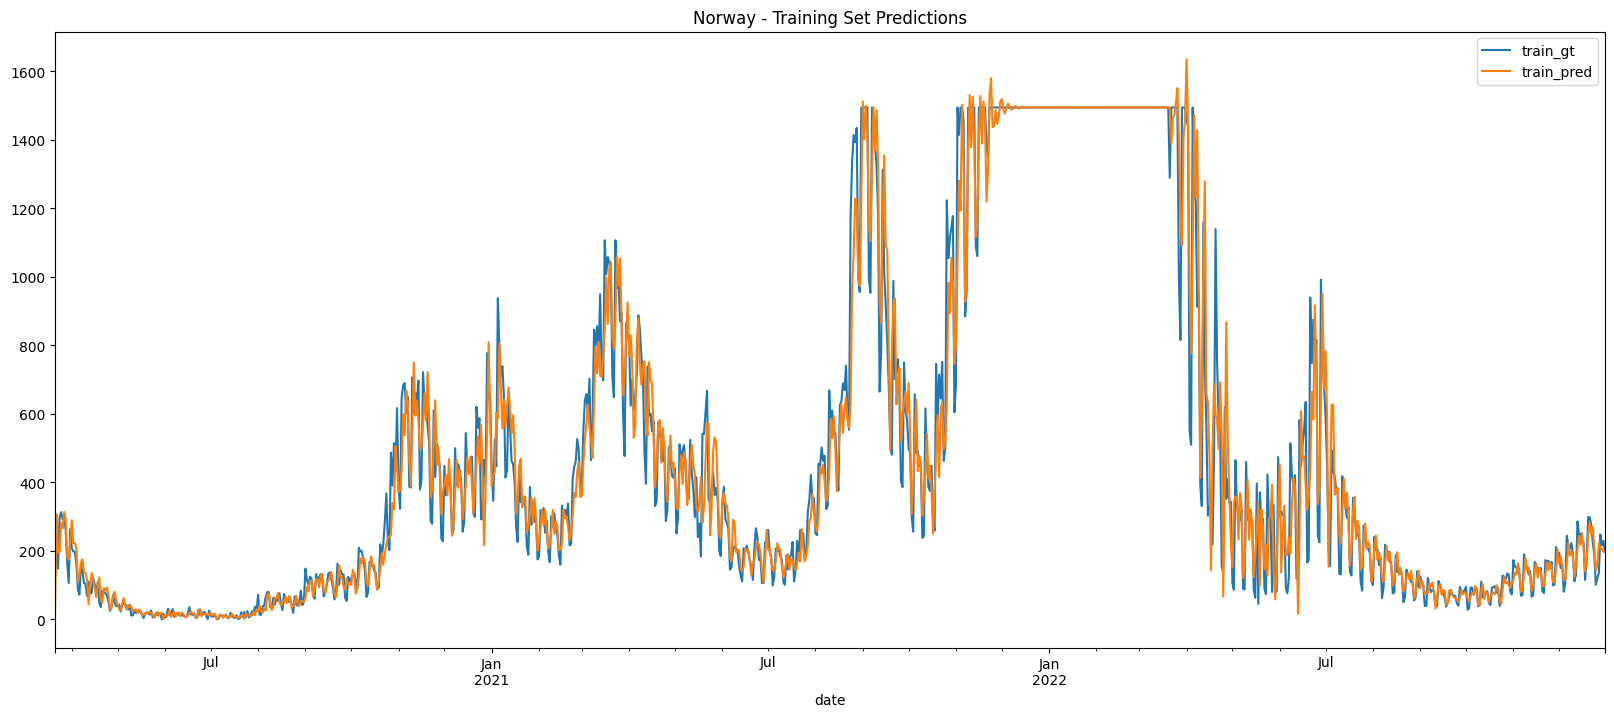

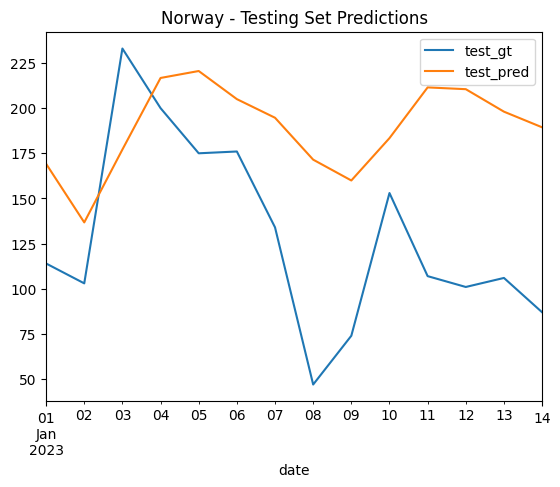

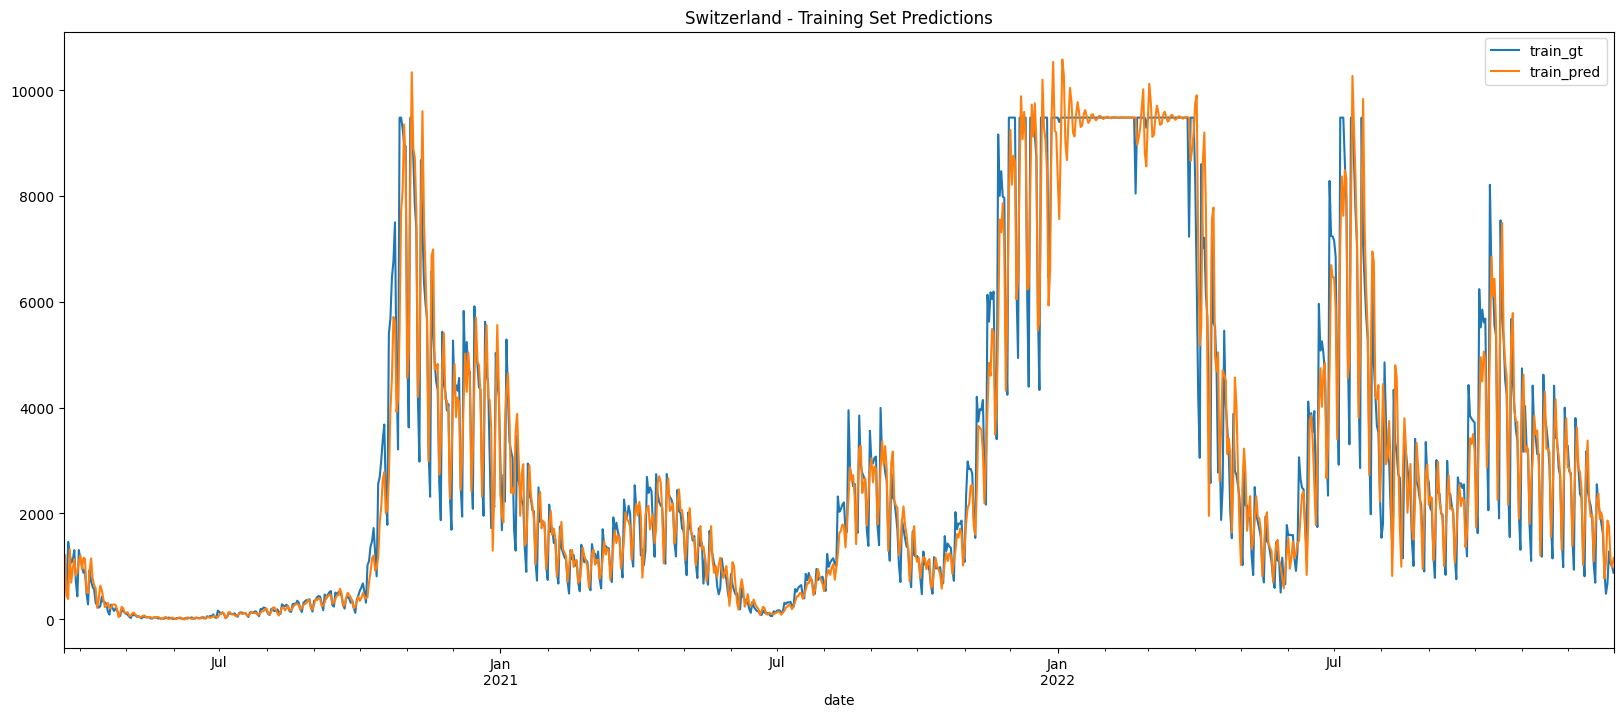

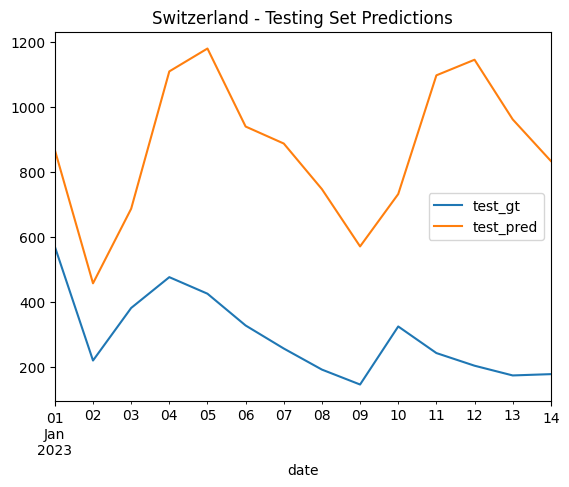

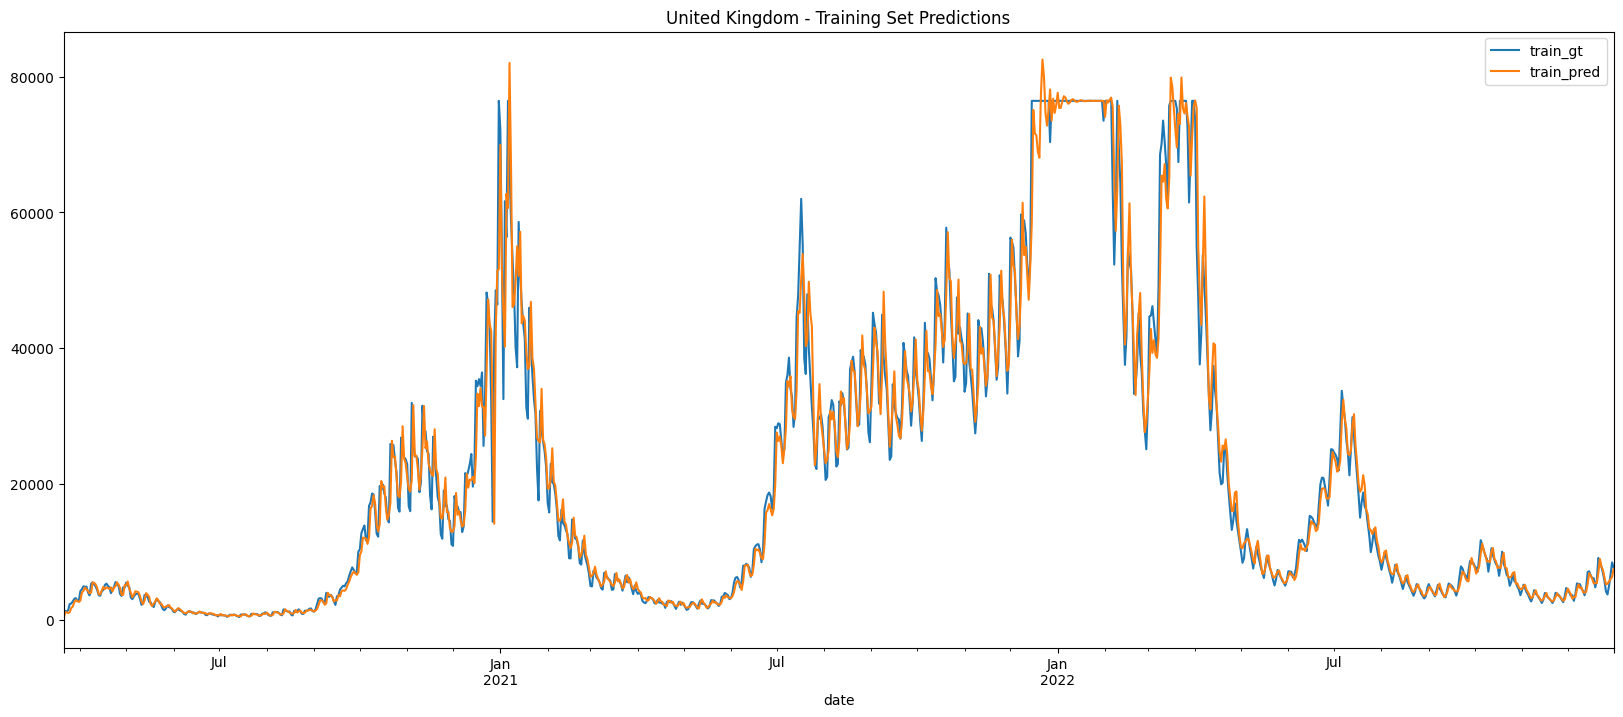

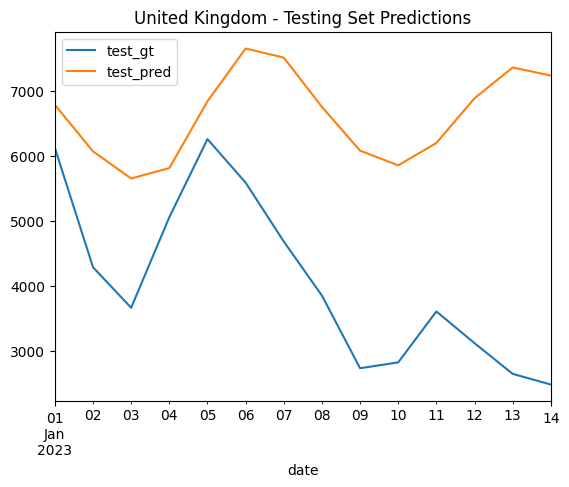

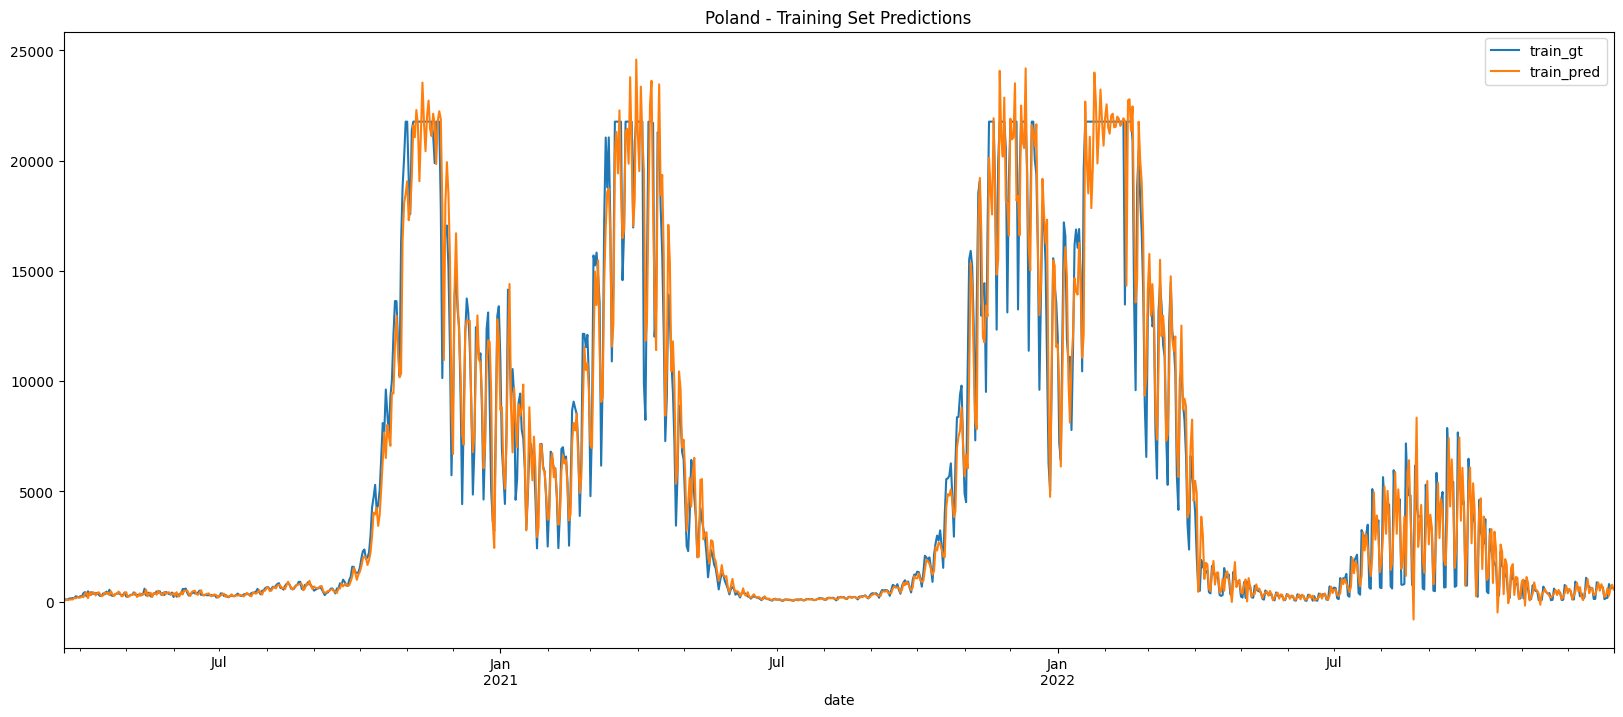

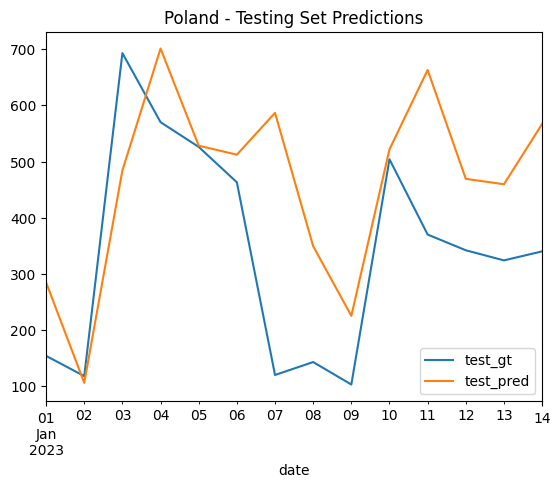

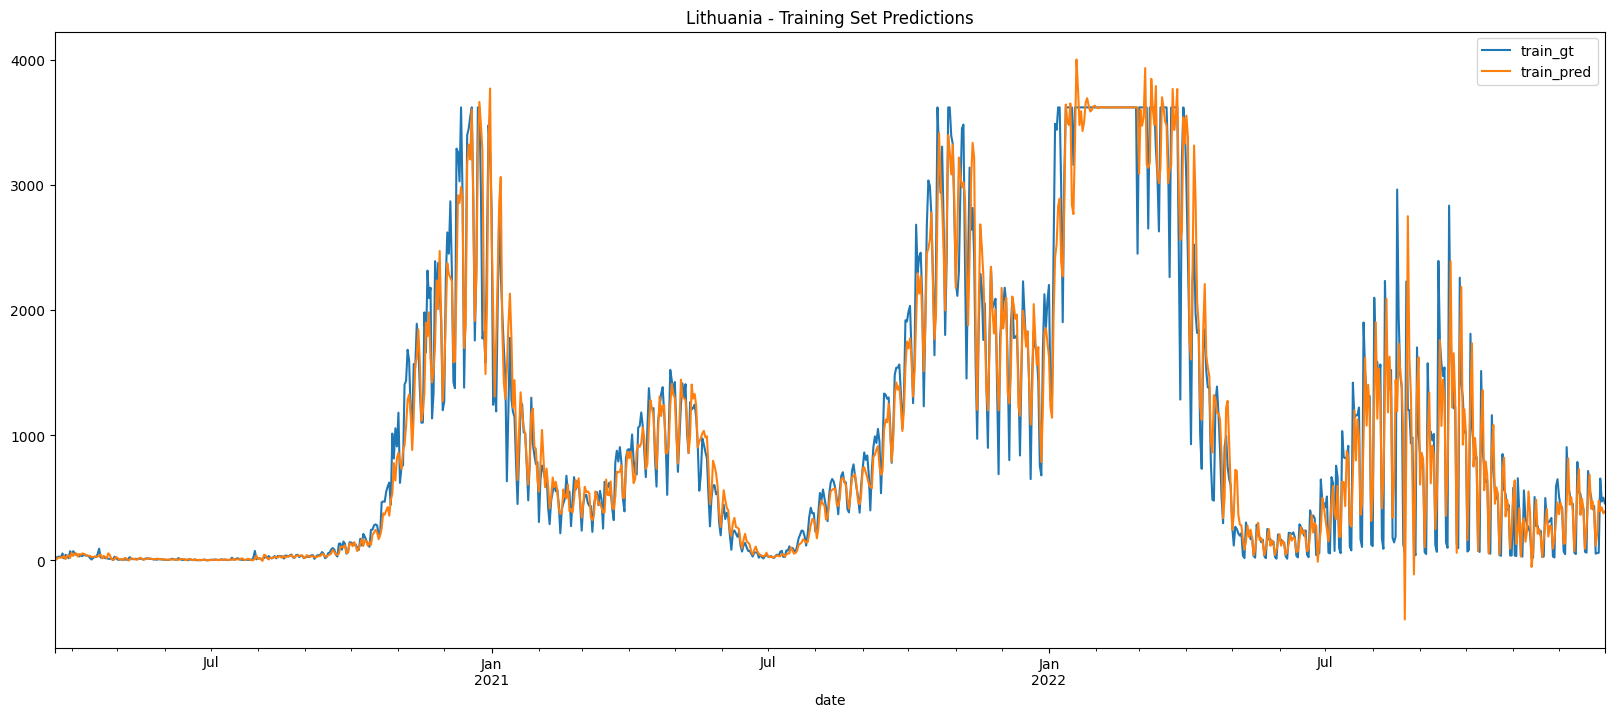

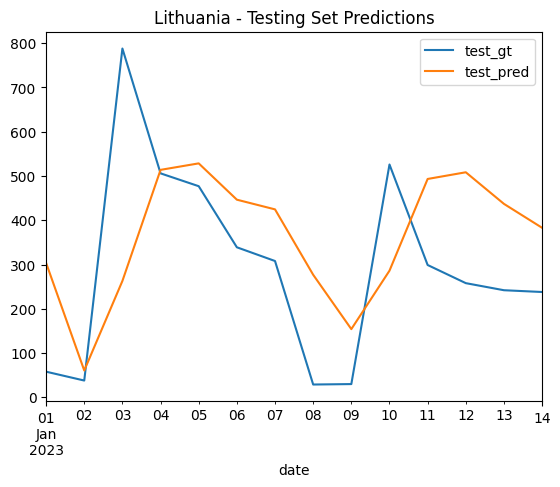

In [ ]:
rmse_results = {}
country_list = ['Belgium', 'Denmark', 'Finland', 'Ireland', 'Italy', 'Norway', 'Switzerland', 'United Kingdom', 'Poland', 'Lithuania']

for country in country_list:
    train_country, test_country = get_country_data(country, train, test) 
    
    # Fit the ARIMA model
    model_country = ARIMA(train_country, order = (5, 1, 3))  
    model_country = model_country.fit()

    print(test_country.shape)

    # Make predictions
    train_pred = model_country.fittedvalues
    pd.concat([train_country, train_pred], axis=1).plot(figsize=(20, 8))
    plt.legend(['train_gt', 'train_pred'])
    plt.title(f'{country} - Training Set Predictions')

    test_pred = model_country.predict(start=len(train_country), end=len(train_country)+len(test_country)-1, dynamic=True)
    test_pred.index = test_country.index
    pd.concat([test_country, test_pred], axis=1).plot()
    plt.legend(['test_gt', 'test_pred'])
    plt.title(f'{country} - Testing Set Predictions')

    # Calculate RMSE
    train_rmse = sqrt(mean_squared_error(train_country, train_pred))
    test_rmse = sqrt(mean_squared_error(test_country, test_pred))
    rmse_results[country] = {'train_rmse': train_rmse, 'test_rmse': test_rmse}

    print(f'{country} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}')

# Convert RMSE results to DataFrame
rmse_df = pd.DataFrame(rmse_results).T
print(rmse_df)


### Auto-ARIMA Performance

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=18738.228, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=18272.992, Time=2.31 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.57 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=18721.263, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=18091.647, Time=3.74 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.36 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=1.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=18150.391, Time=0.80 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=18030.546, Time=2.86 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=18217.633, Time=0.75 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.19 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=3.26 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=17921.909, Time=6.84 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AI

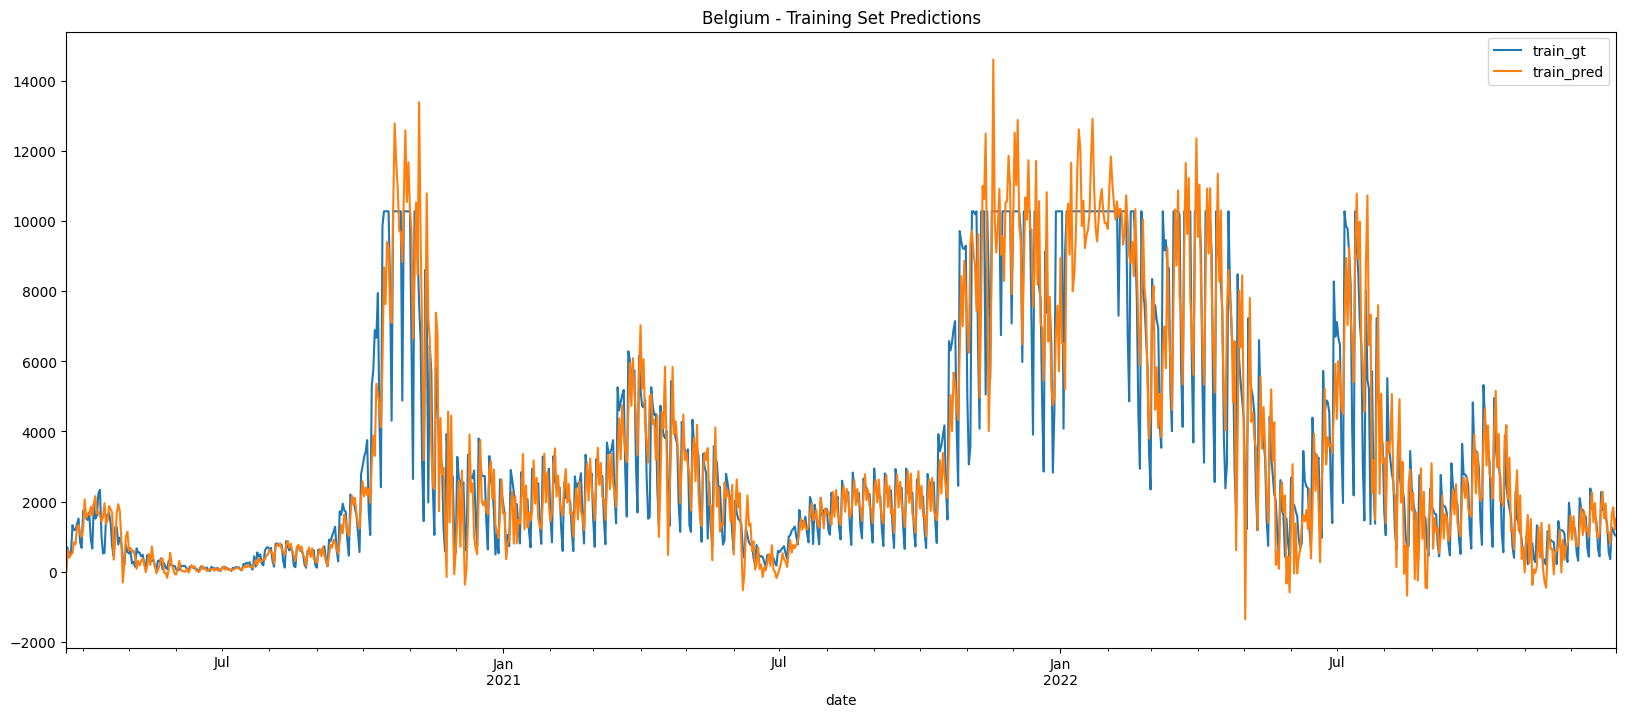

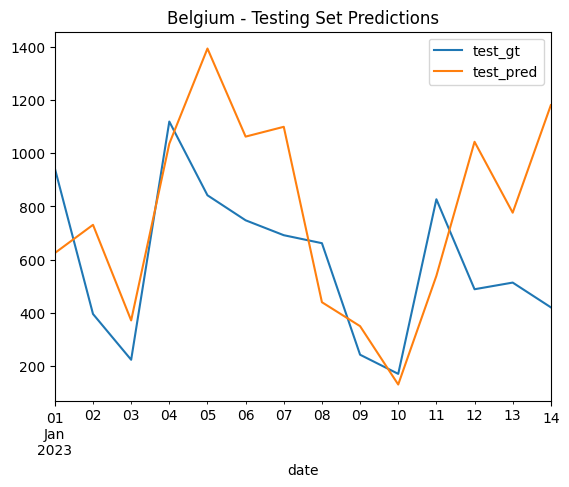

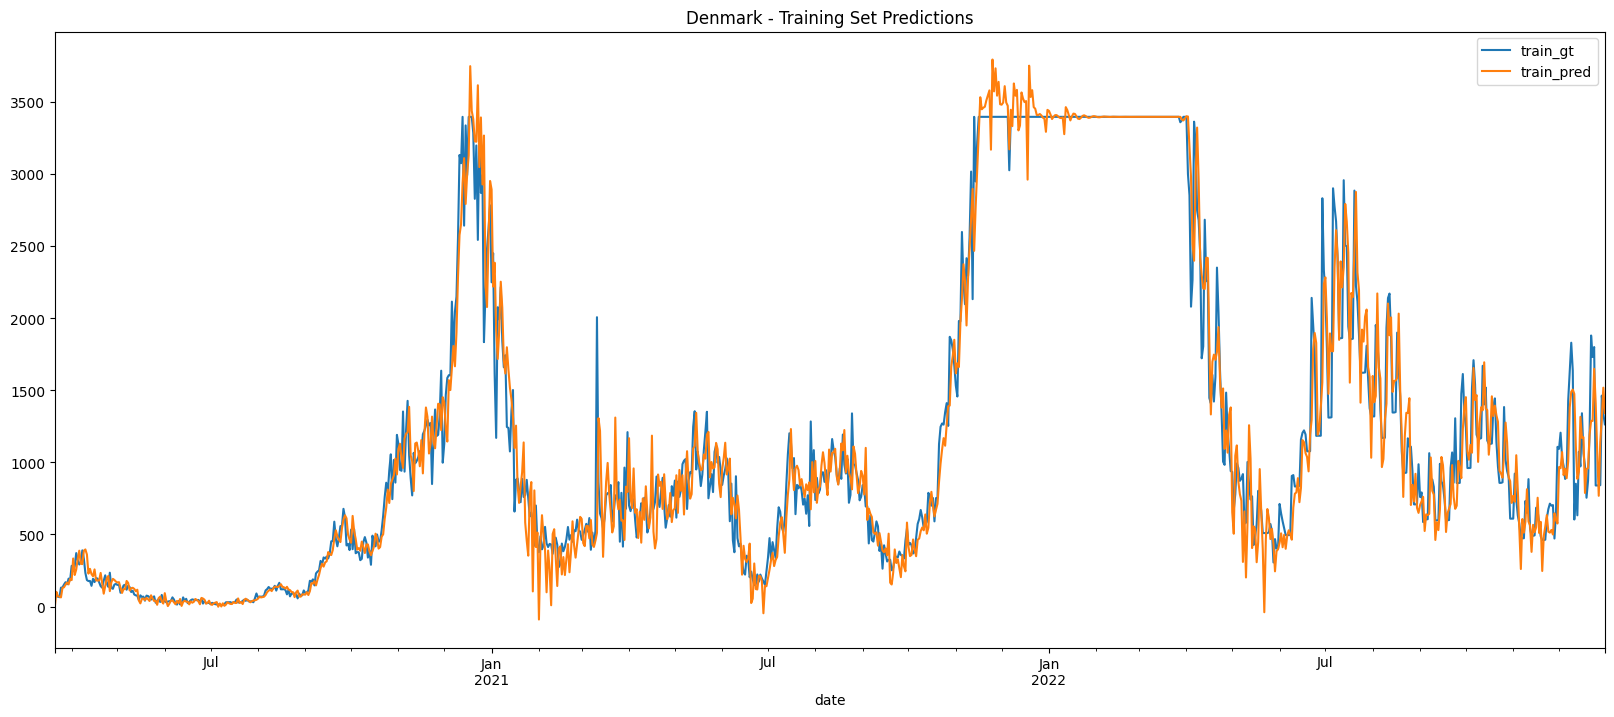

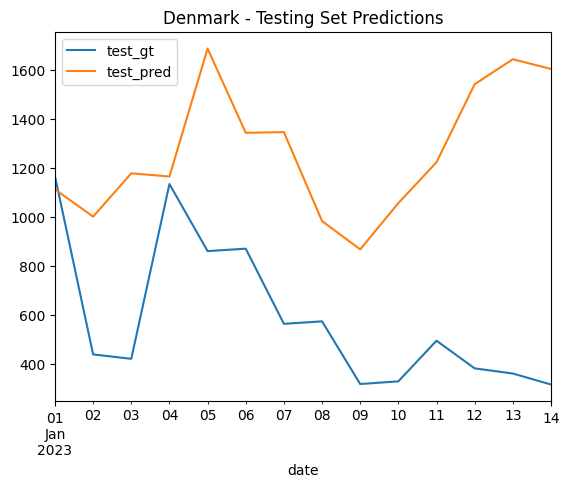

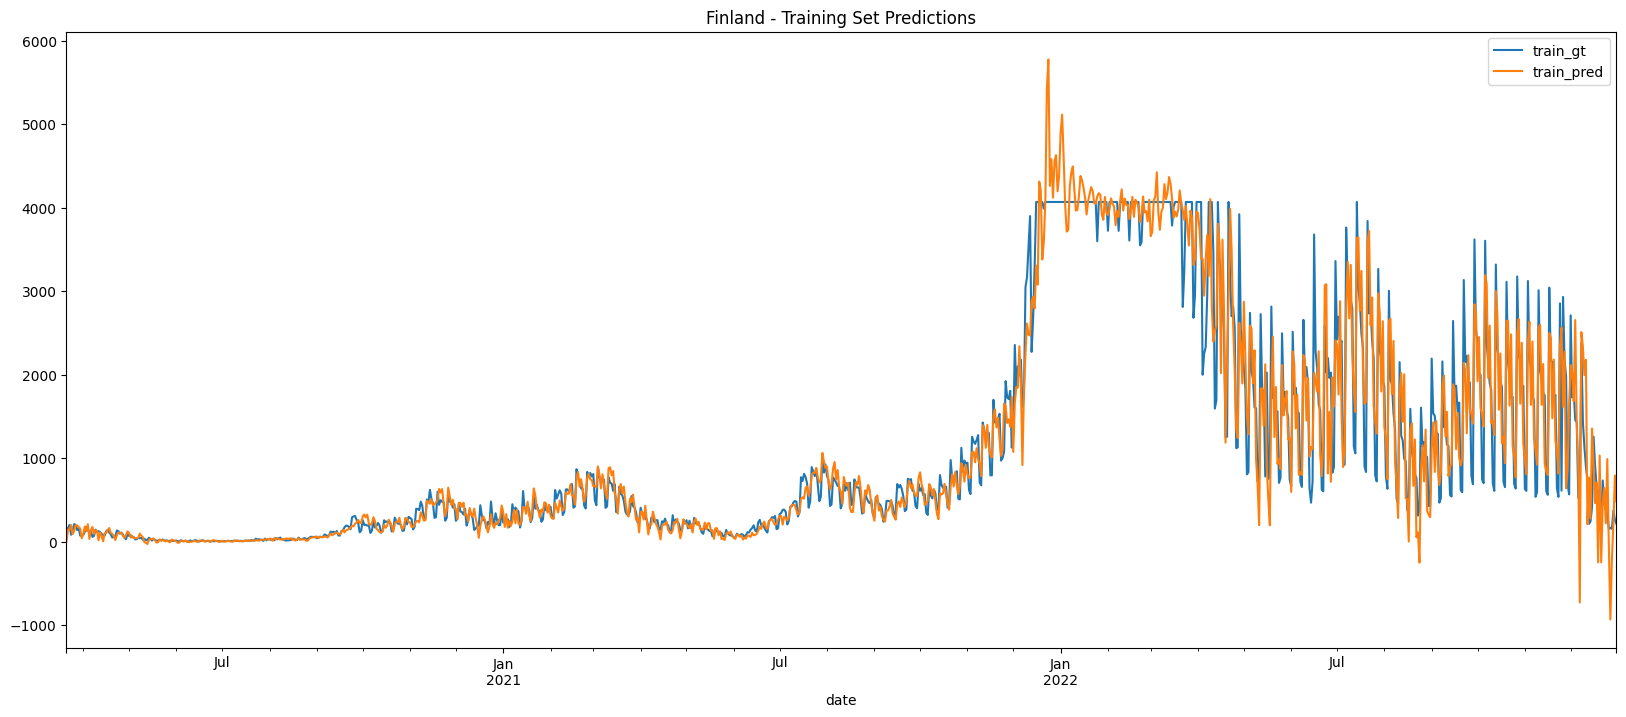

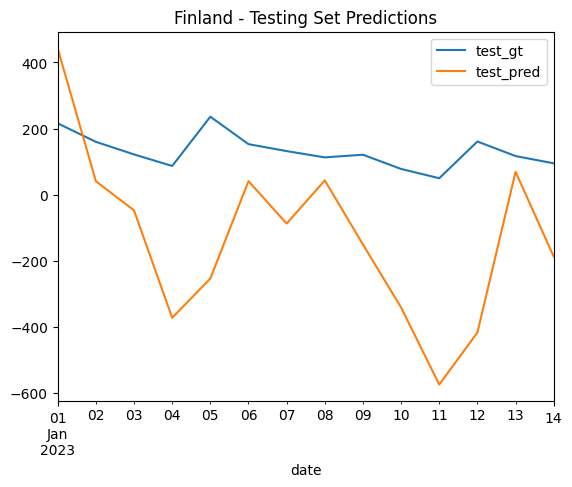

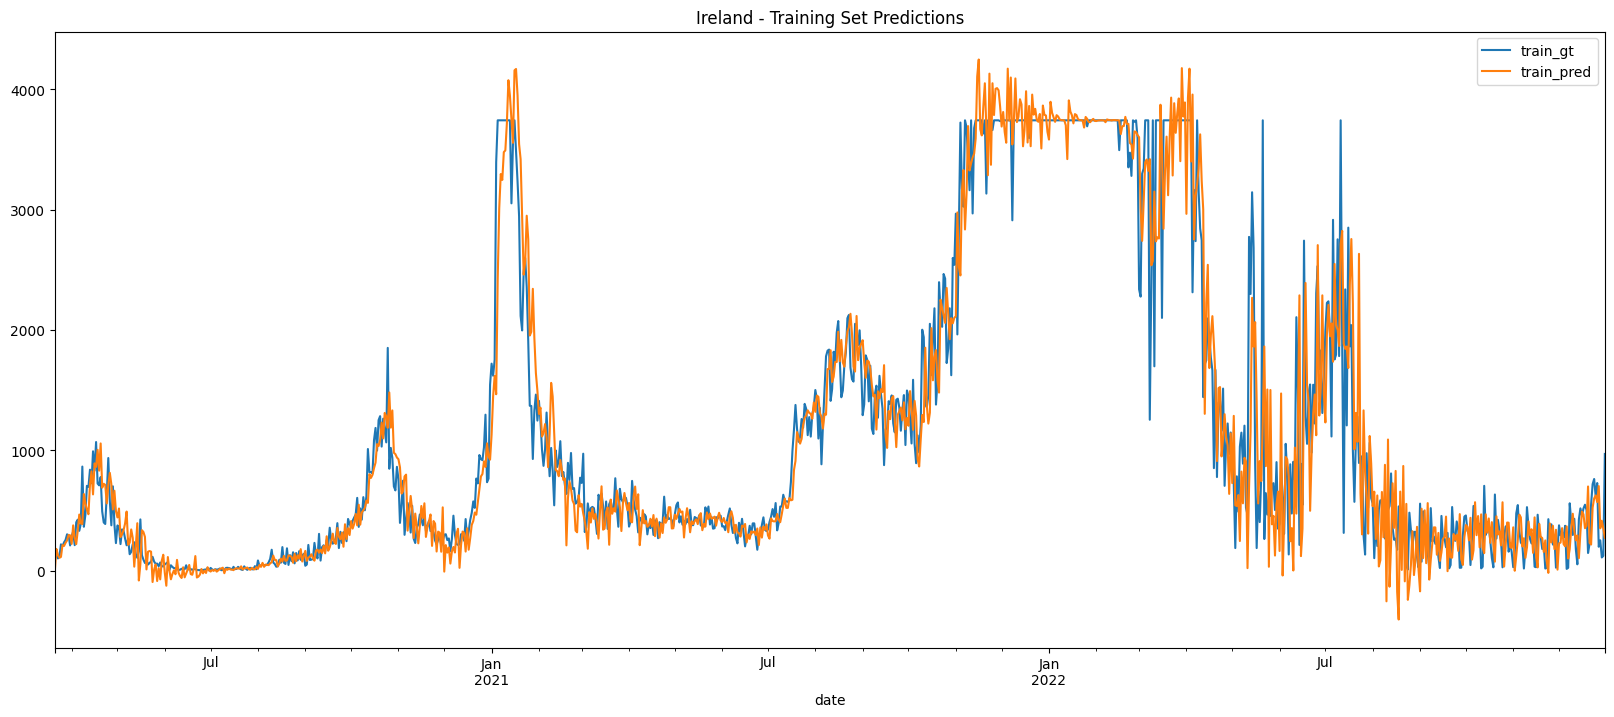

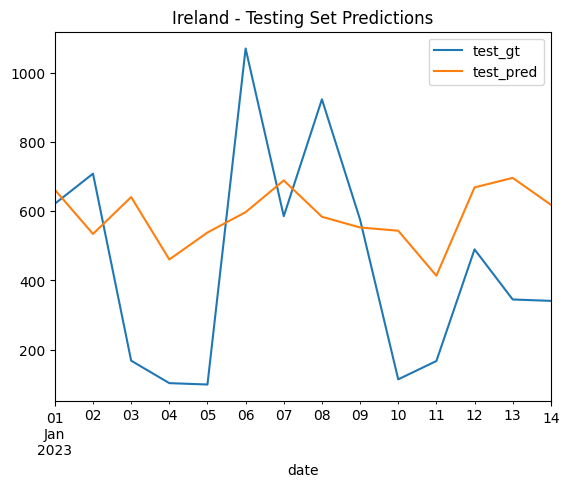

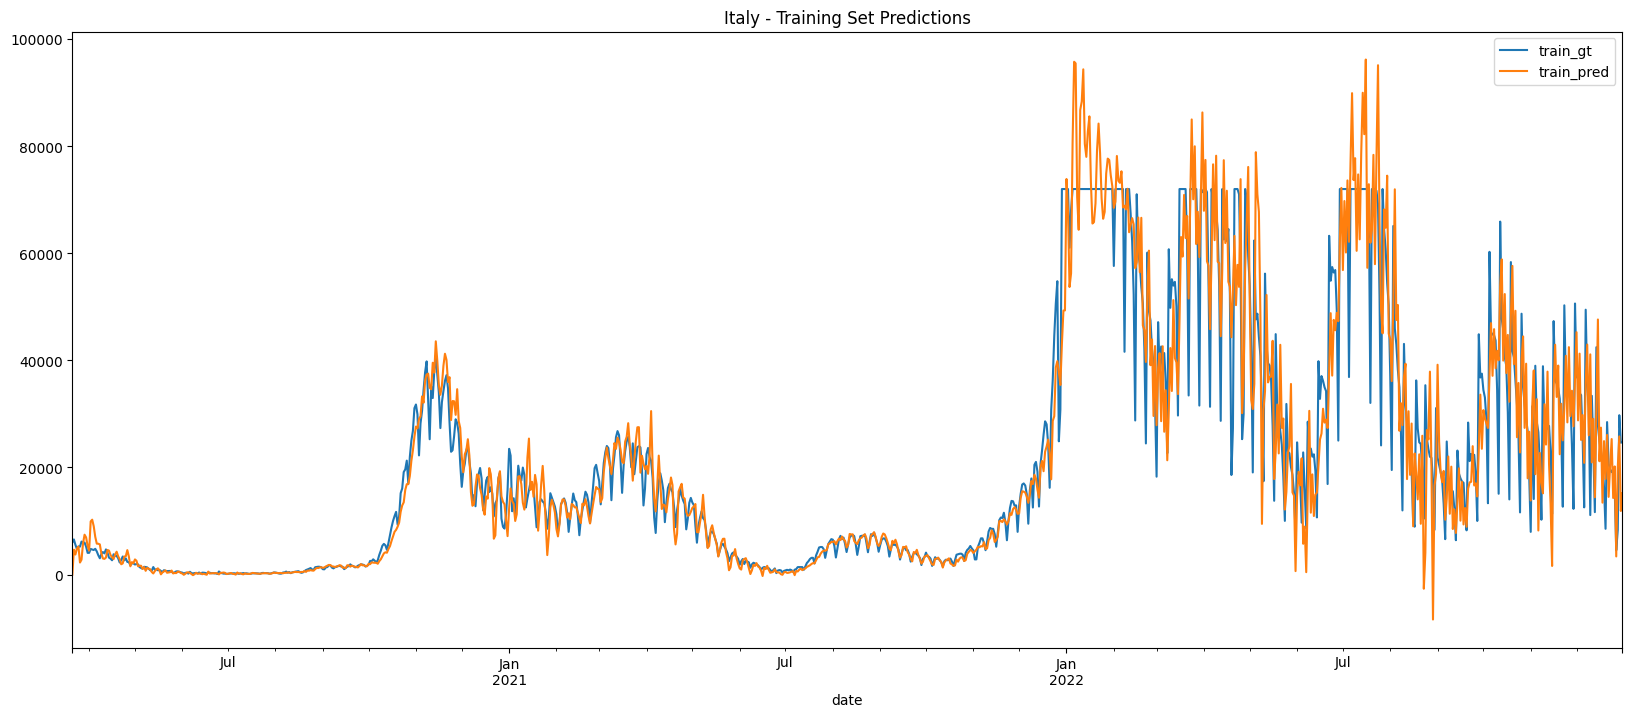

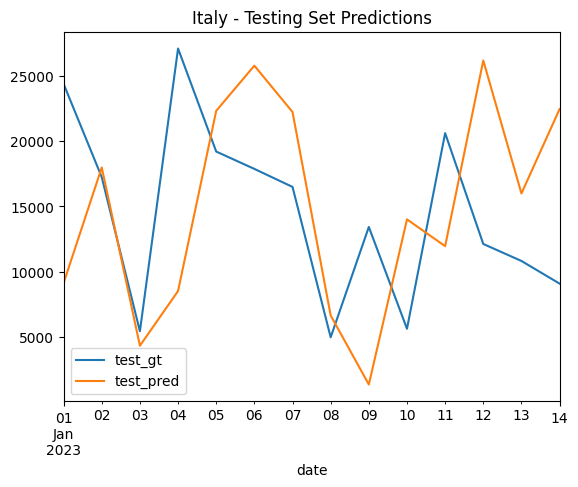

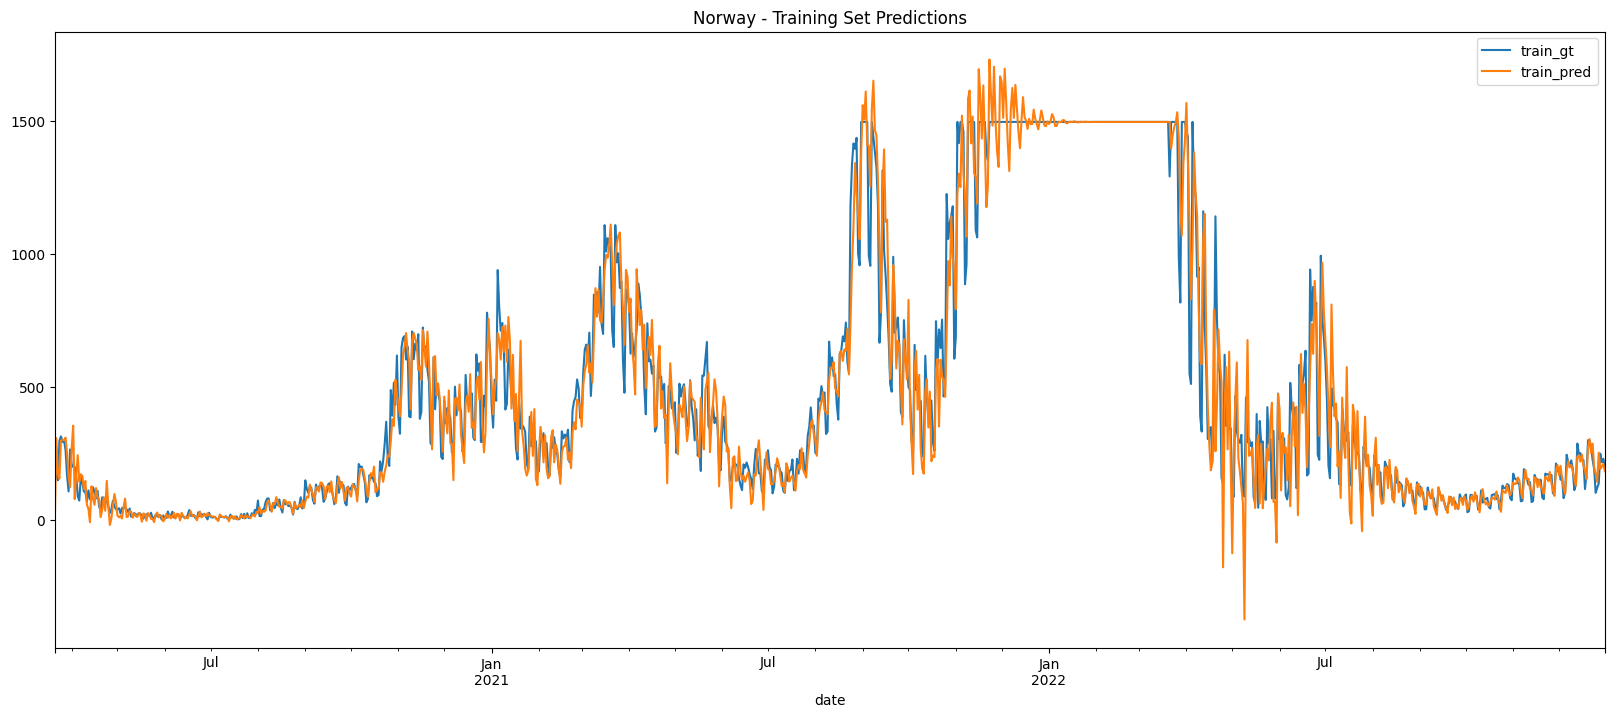

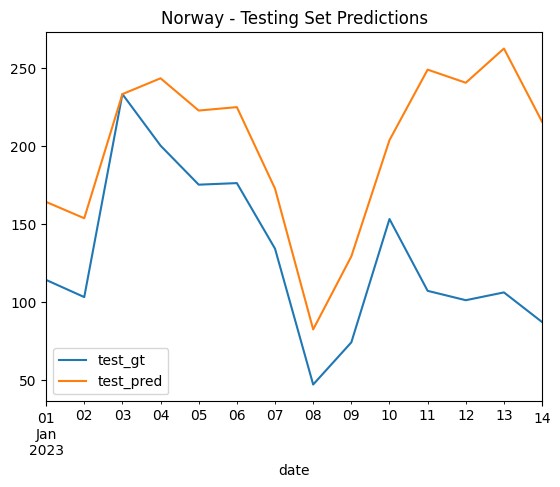

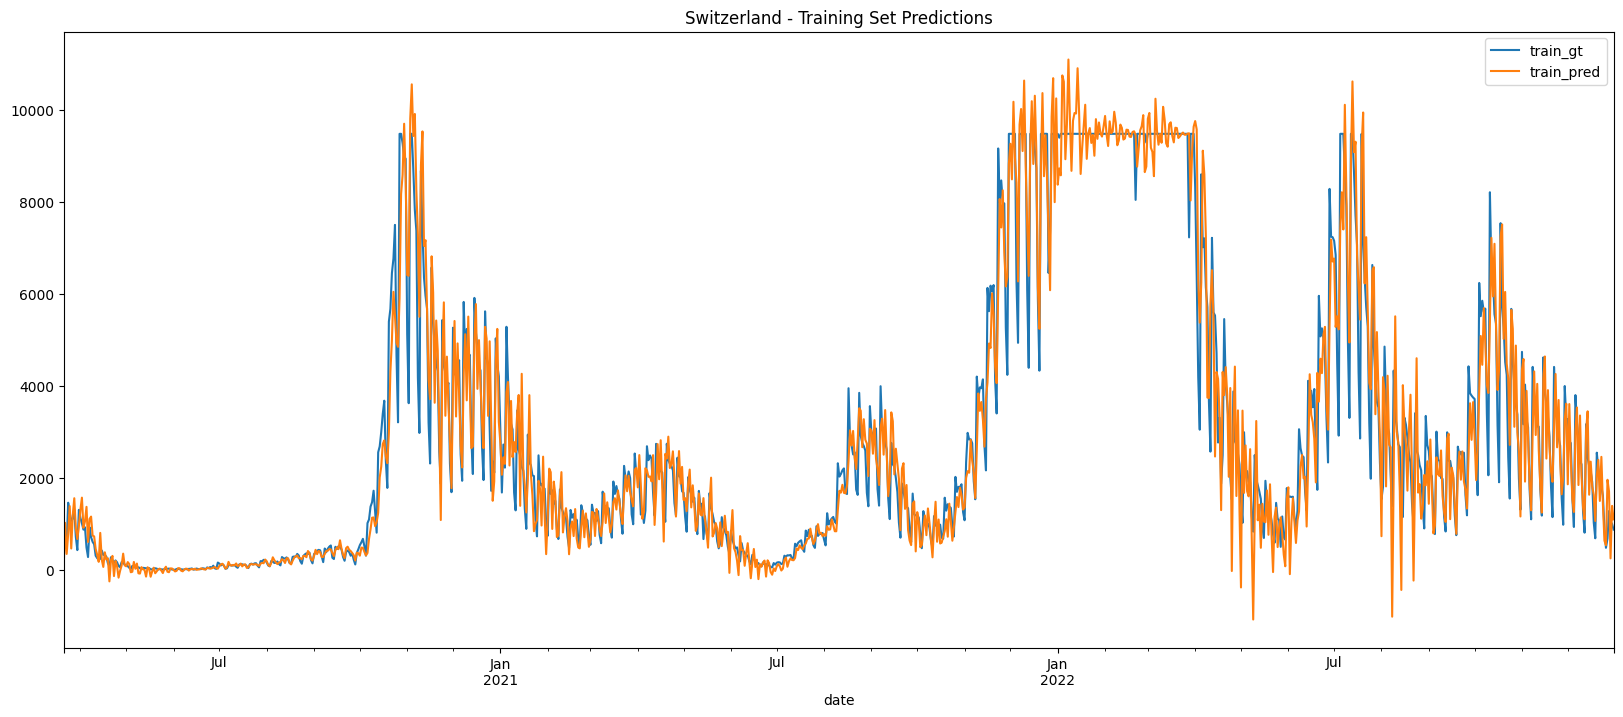

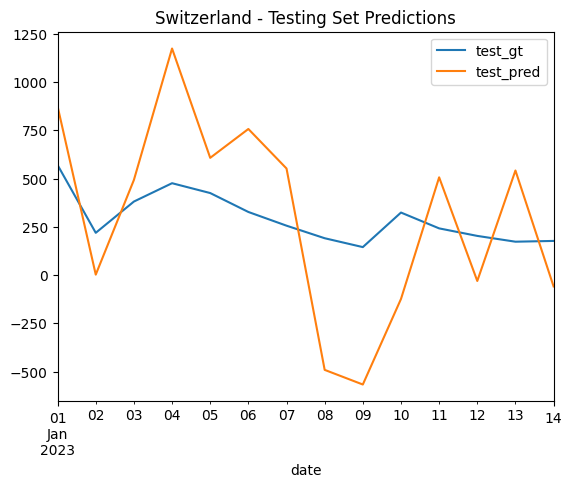

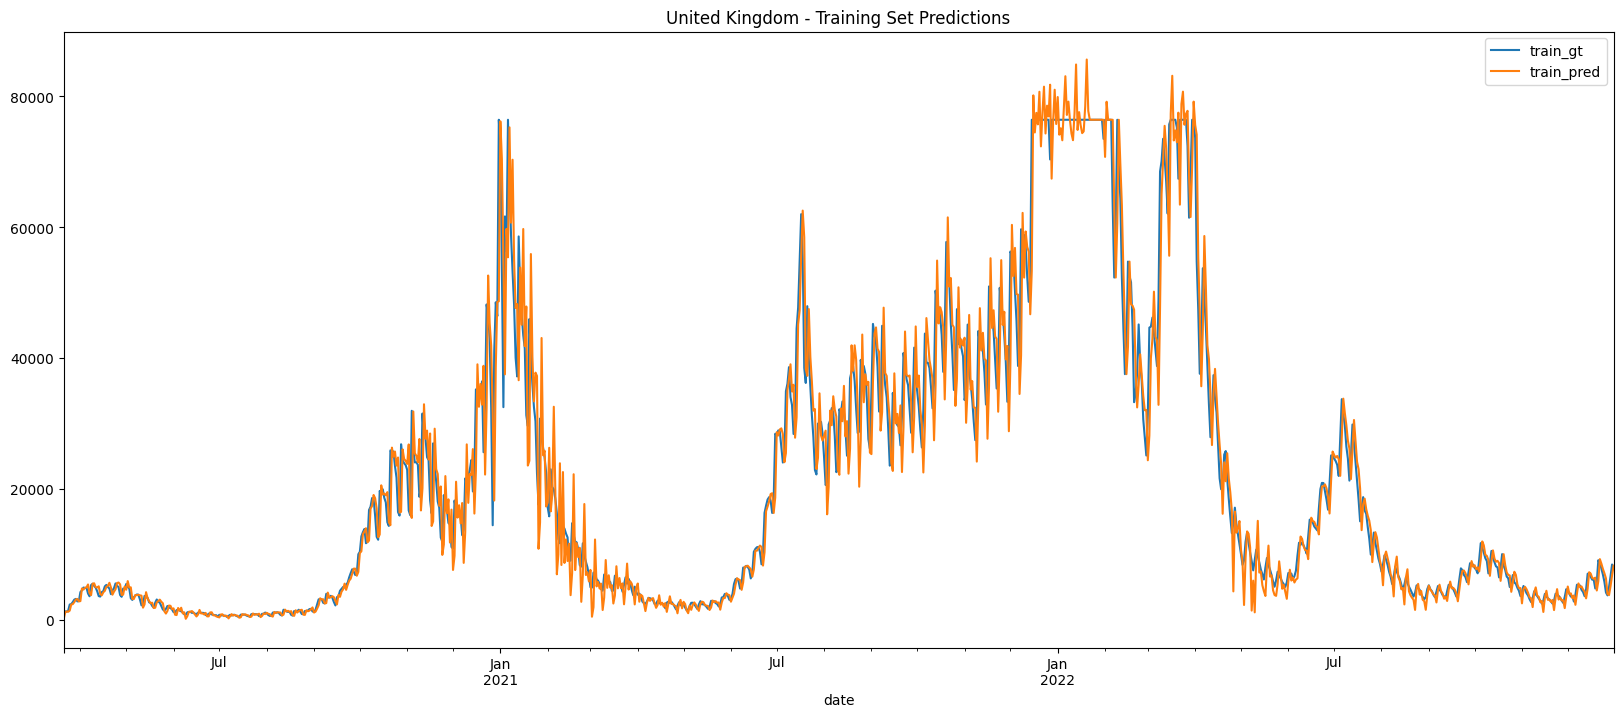

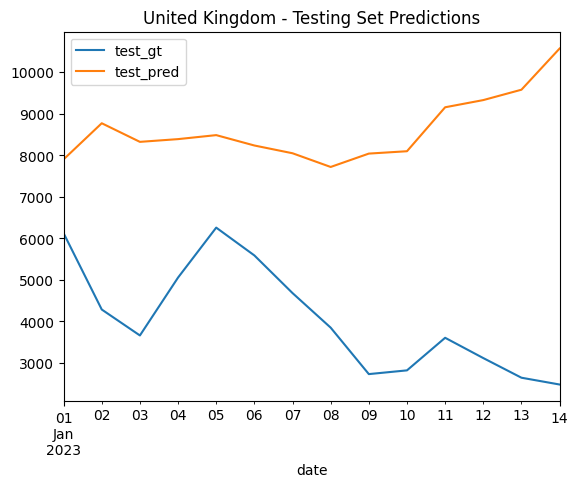

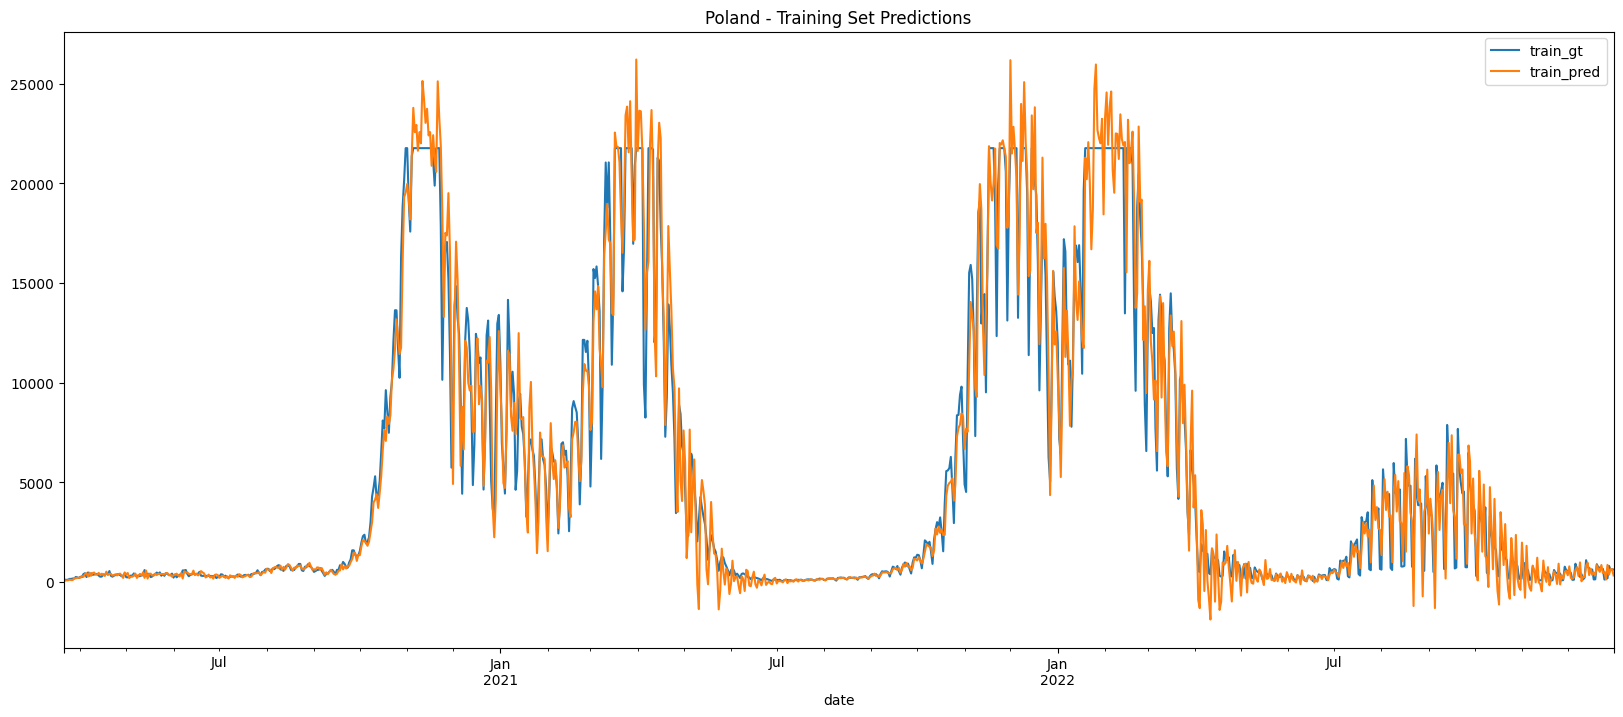

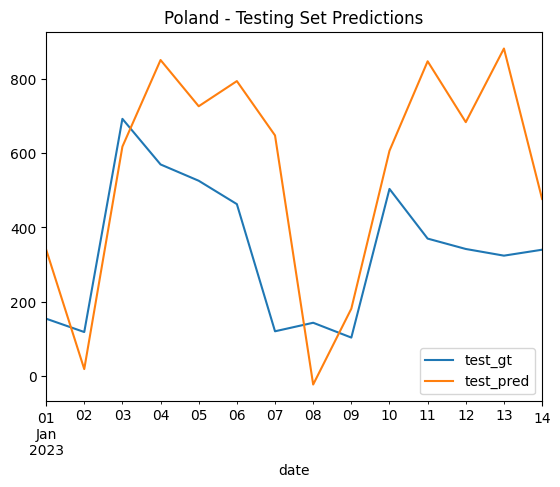

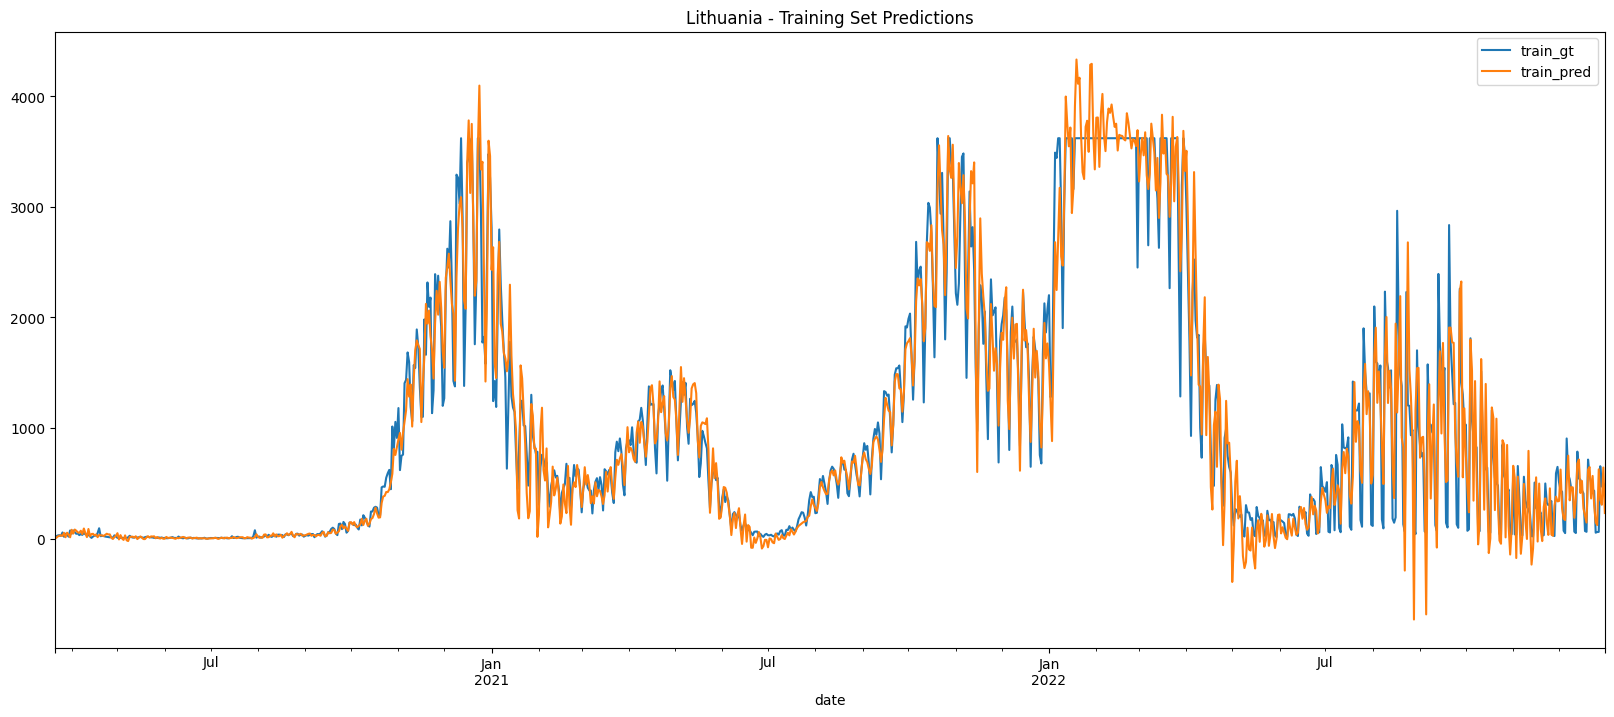

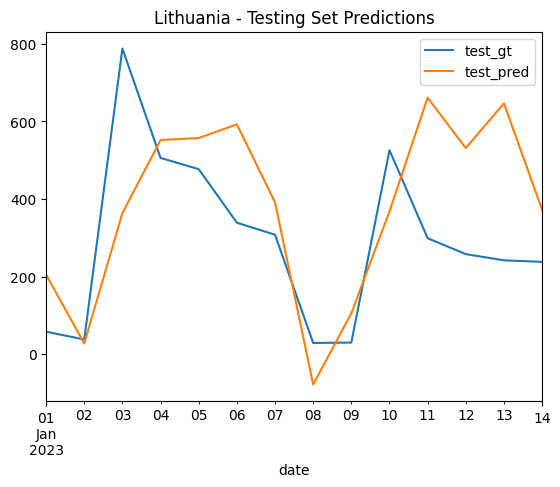

In [ ]:
rmse_results = {}
country_list = ['Belgium', 'Denmark', 'Finland', 'Ireland', 'Italy', 'Norway', 'Switzerland', 'United Kingdom', 'Poland', 'Lithuania']

for country in country_list:
    train_country, test_country = get_country_data(country, train, test) 
    
    # Fit the Auto ARIMA model
    model_auto_country = auto_arima(train_country, start_p=1, start_q=1,
                                    max_p=5, max_q=5, m=12,
                                    start_P=0, seasonal=True,
                                    d=1, D=1, trace=True,
                                    error_action='ignore',  
                                    suppress_warnings=True, 
                                    stepwise=True)
    print(f'{country} - AIC: {model_auto_country.aic()}')

    # Make predictions on the training set
    train_pred = model_auto_country.predict_in_sample()
    pd.concat([train_country, pd.Series(train_pred, index=train_country.index)], axis=1).plot(figsize=(20, 8))
    plt.legend(['train_gt', 'train_pred'])
    plt.title(f'{country} - Training Set Predictions')

    # Make predictions on the testing set
    test_pred = model_auto_country.predict(n_periods=len(test_country))
    pd.concat([test_country, pd.Series(test_pred, index=test_country.index)], axis=1).plot()
    plt.legend(['test_gt', 'test_pred'])
    plt.title(f'{country} - Testing Set Predictions')

    # Calculate RMSE
    train_rmse = sqrt(mean_squared_error(train_country, train_pred))
    test_rmse = sqrt(mean_squared_error(test_country, test_pred))
    rmse_results[country] = {
        'train_rmse': train_rmse, 
        'test_rmse': test_rmse,
        'order': model_auto_country.order,
        'seasonal_order': model_auto_country.seasonal_order,
        'aic': model_auto_country.aic()
    }

    print(f'{country} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}, Order: {model_auto_country.order}, Seasonal Order: {model_auto_country.seasonal_order}, AIC: {model_auto_country.aic()}')

# Convert RMSE and ARIMA parameter results to DataFrame
rmse_df = pd.DataFrame(rmse_results).T
print(rmse_df)


### Prophet Single Performance

17:04:03 - cmdstanpy - INFO - Chain [1] start processing
17:04:04 - cmdstanpy - INFO - Chain [1] done processing
17:04:04 - cmdstanpy - INFO - Chain [1] start processing


Belgium - Train RMSE: 1711.7758233906309, Test RMSE: 556.0900421712332, Test SRMSE: 93.90013979492541


17:04:04 - cmdstanpy - INFO - Chain [1] done processing
17:04:05 - cmdstanpy - INFO - Chain [1] start processing


Denmark - Train RMSE: 2496.7725075198778, Test RMSE: 408.55191659851437, Test SRMSE: 69.59151761016183


17:04:05 - cmdstanpy - INFO - Chain [1] done processing
17:04:06 - cmdstanpy - INFO - Chain [1] start processing


Finland - Train RMSE: 627.6668847123697, Test RMSE: 277.5533699734428, Test SRMSE: 211.06720150071695


17:04:06 - cmdstanpy - INFO - Chain [1] done processing
17:04:06 - cmdstanpy - INFO - Chain [1] start processing


Ireland - Train RMSE: 1050.5846557534162, Test RMSE: 279.09297320250283, Test SRMSE: 61.8733432277916


17:04:07 - cmdstanpy - INFO - Chain [1] done processing


Italy - Train RMSE: 14935.357941987048, Test RMSE: 21810.985043022745, Test SRMSE: 149.40054142765084


17:04:08 - cmdstanpy - INFO - Chain [1] start processing
17:04:08 - cmdstanpy - INFO - Chain [1] done processing
17:04:09 - cmdstanpy - INFO - Chain [1] start processing


Lithuania - Train RMSE: 665.1922601161277, Test RMSE: 189.16967450541028, Test SRMSE: 64.03228827552572


17:04:09 - cmdstanpy - INFO - Chain [1] done processing
17:04:09 - cmdstanpy - INFO - Chain [1] start processing


Norway - Train RMSE: 1243.5329316232094, Test RMSE: 138.5509933566079, Test SRMSE: 107.16651419848127


17:04:10 - cmdstanpy - INFO - Chain [1] done processing


Poland - Train RMSE: 3446.5755540938294, Test RMSE: 295.16237845429174, Test SRMSE: 86.6304674708613


17:04:11 - cmdstanpy - INFO - Chain [1] start processing
17:04:13 - cmdstanpy - INFO - Chain [1] done processing
17:04:14 - cmdstanpy - INFO - Chain [1] start processing


Switzerland - Train RMSE: 482.45086660456013, Test RMSE: 322.3488658931079, Test SRMSE: 109.82925584092263


17:04:14 - cmdstanpy - INFO - Chain [1] done processing


United Kingdom - Train RMSE: 8354.00939164358, Test RMSE: 3106.00551528402, Test SRMSE: 76.40312965874175
                  train_rmse     test_rmse  test_srmse
Belgium          1711.775823    556.090042   93.900140
Denmark          2496.772508    408.551917   69.591518
Finland           627.666885    277.553370  211.067202
Ireland          1050.584656    279.092973   61.873343
Italy           14935.357942  21810.985043  149.400541
Lithuania         665.192260    189.169675   64.032288
Norway           1243.532932    138.550993  107.166514
Poland           3446.575554    295.162378   86.630467
Switzerland       482.450867    322.348866  109.829256
United Kingdom   8354.009392   3106.005515   76.403130


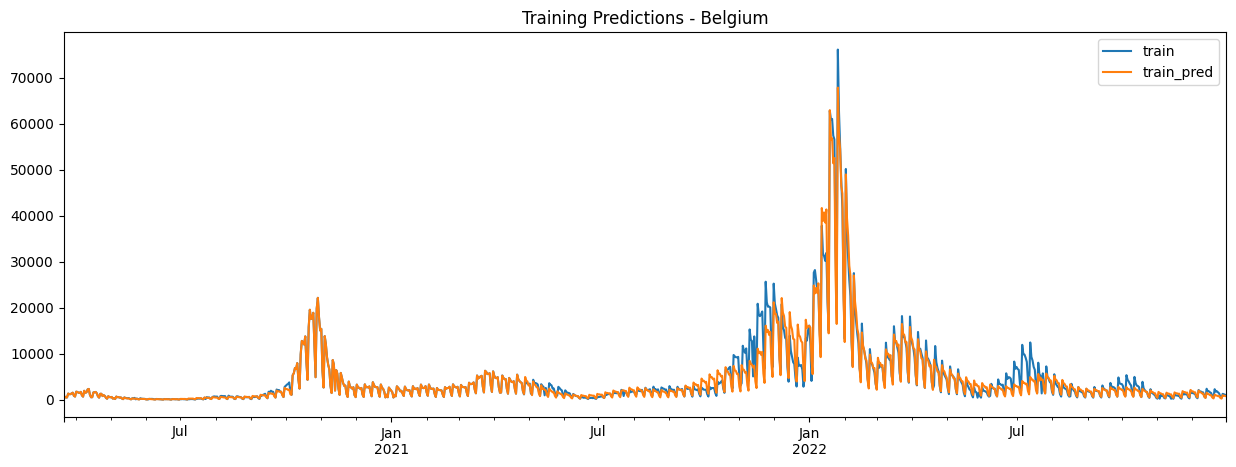

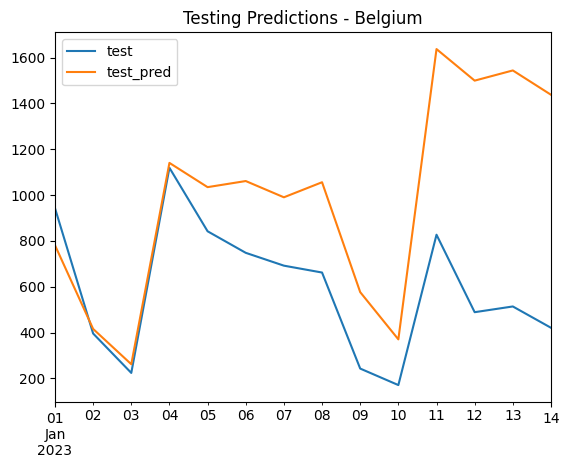

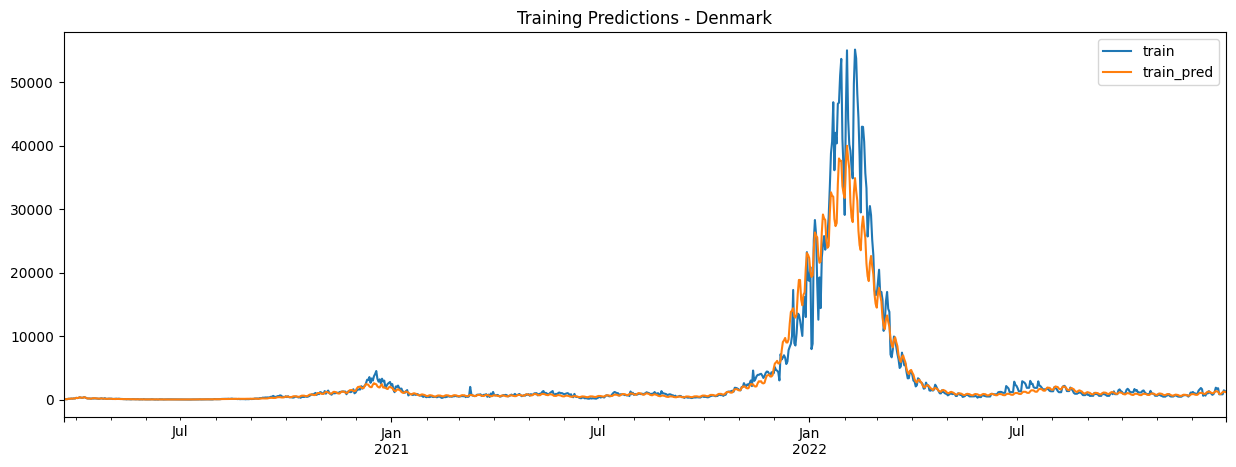

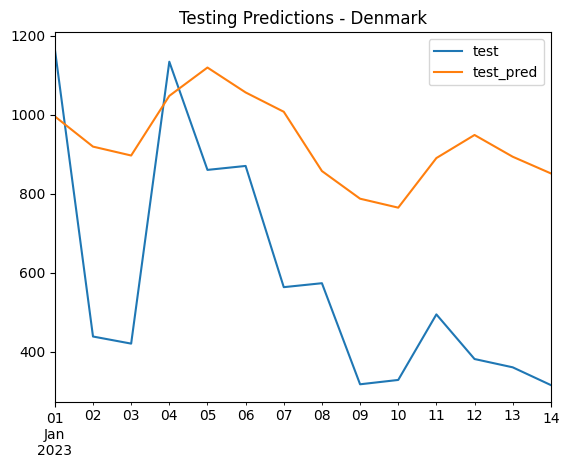

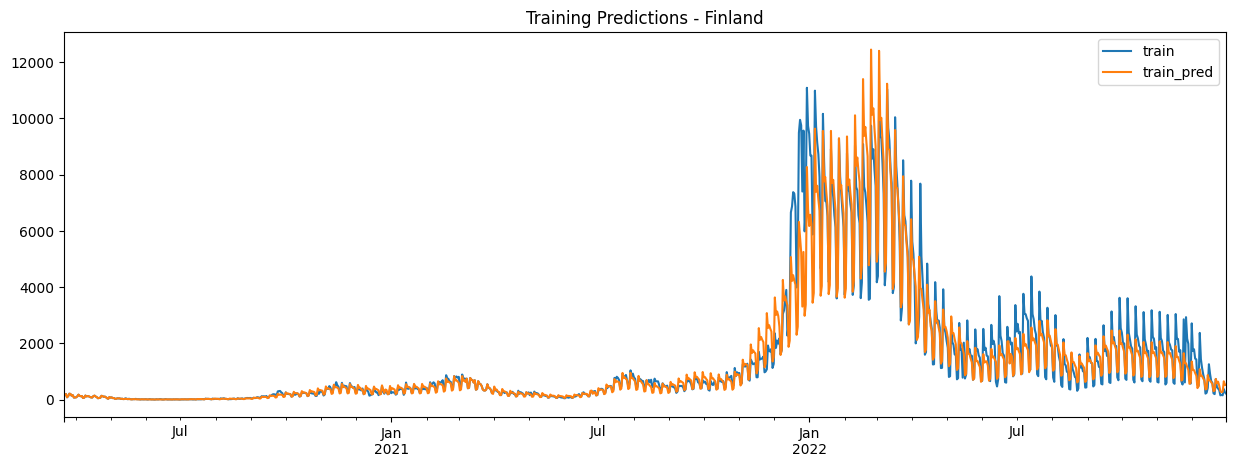

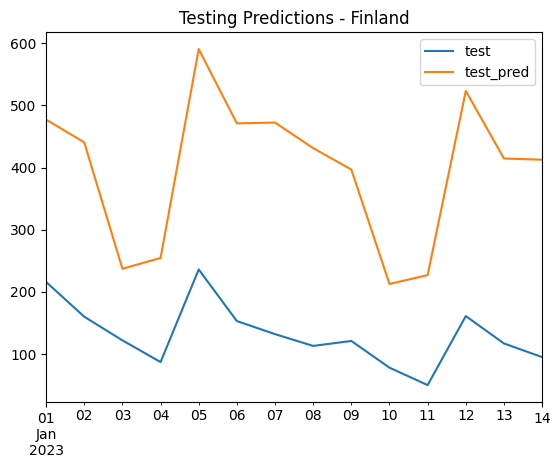

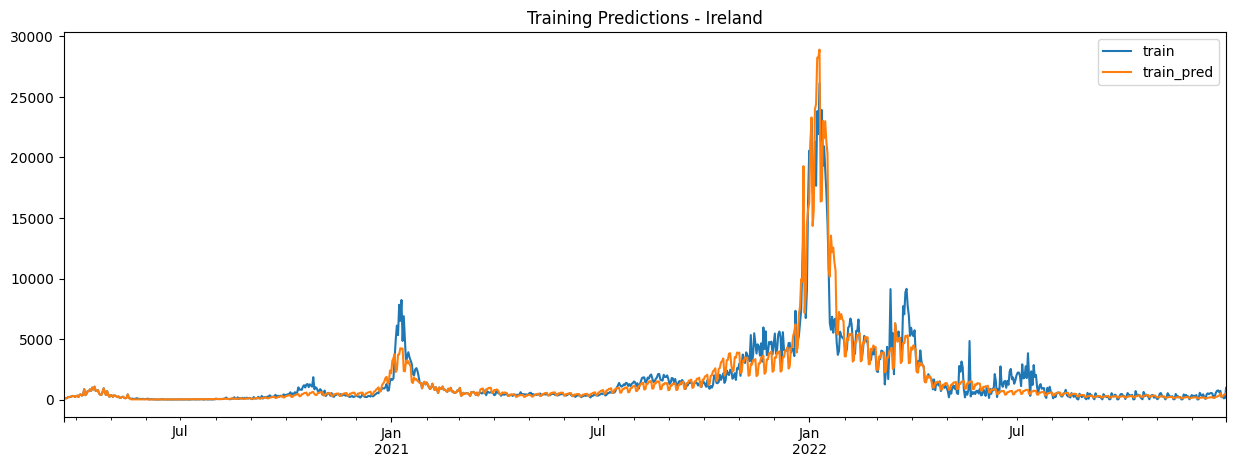

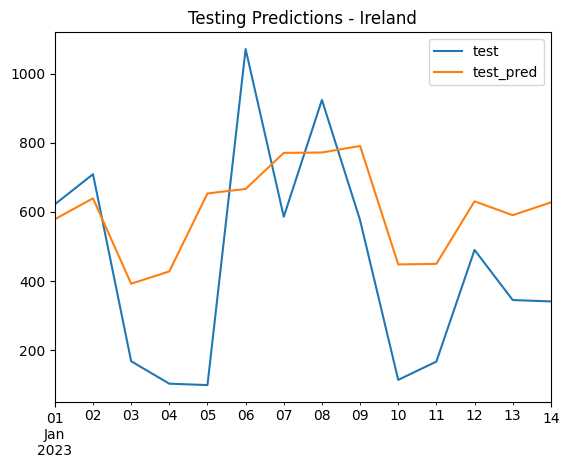

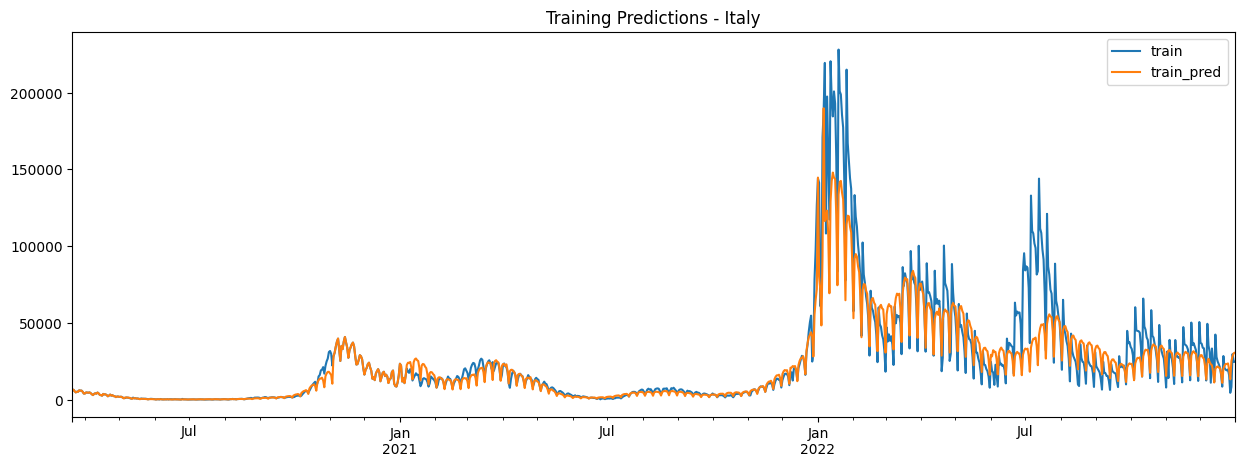

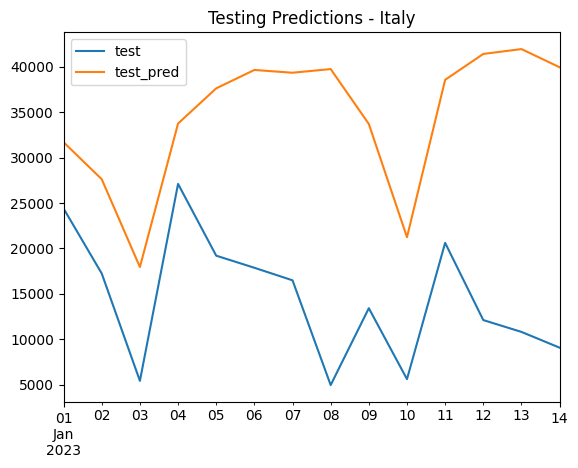

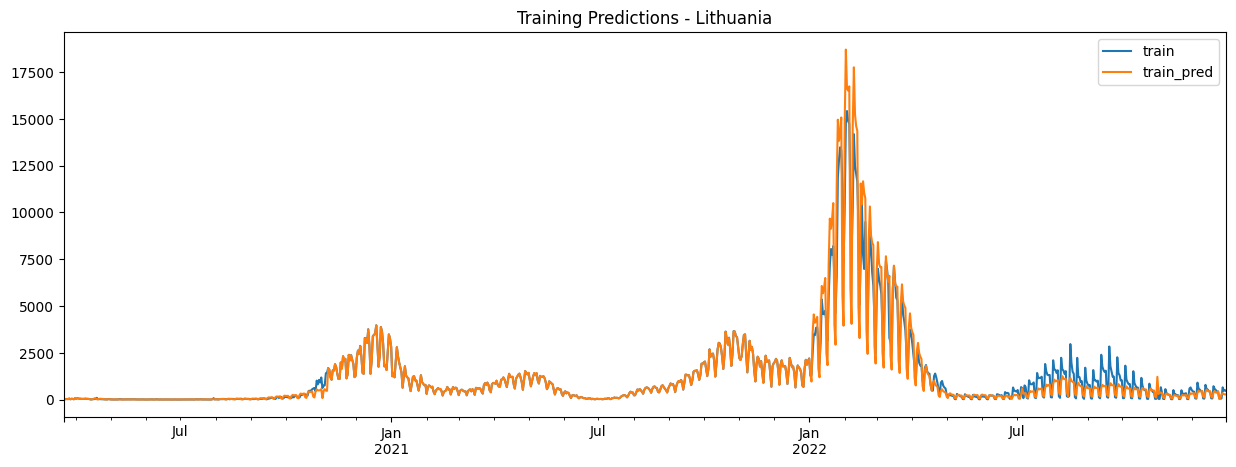

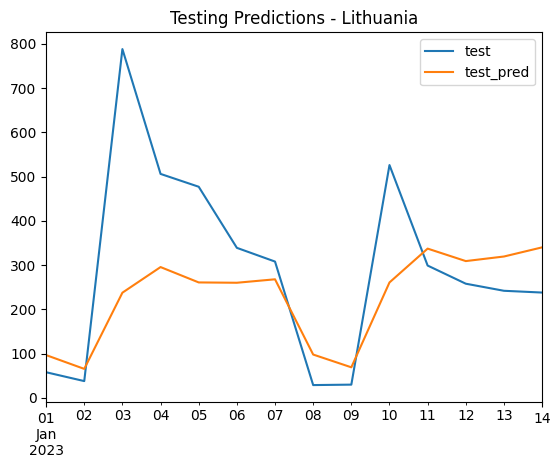

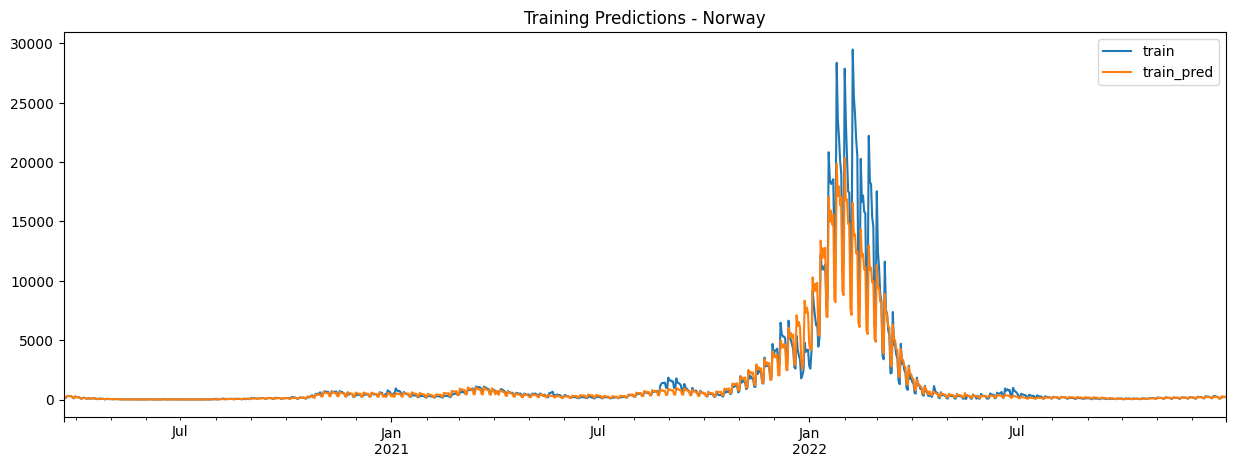

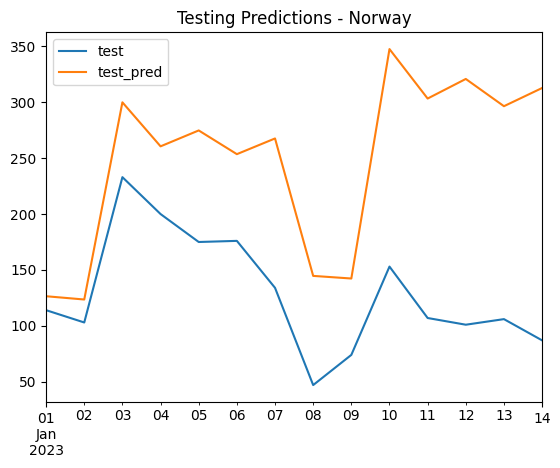

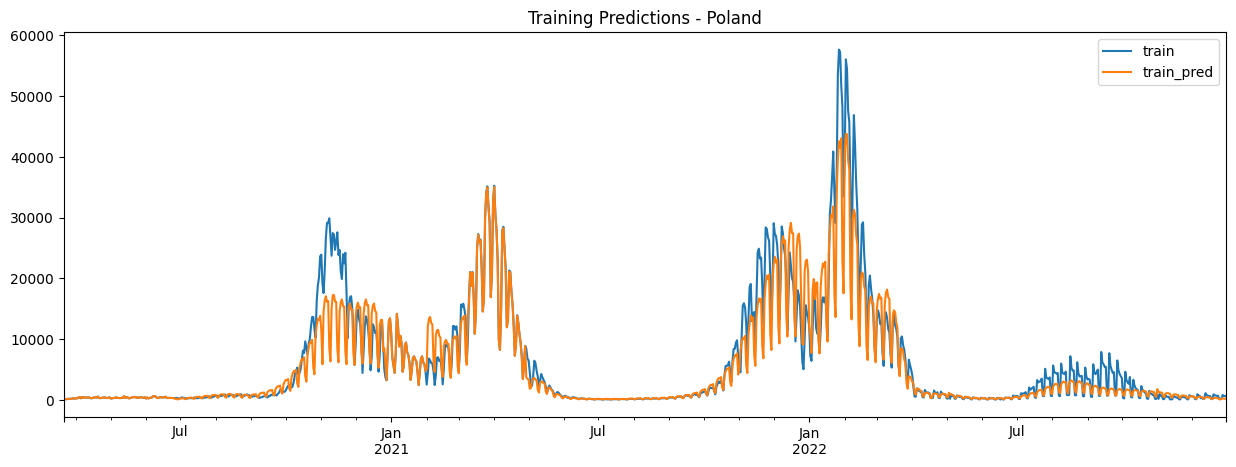

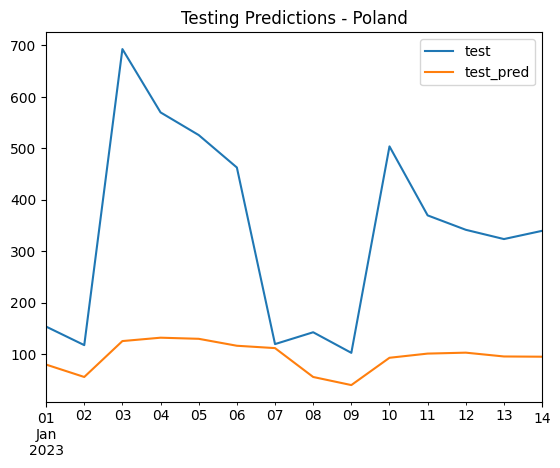

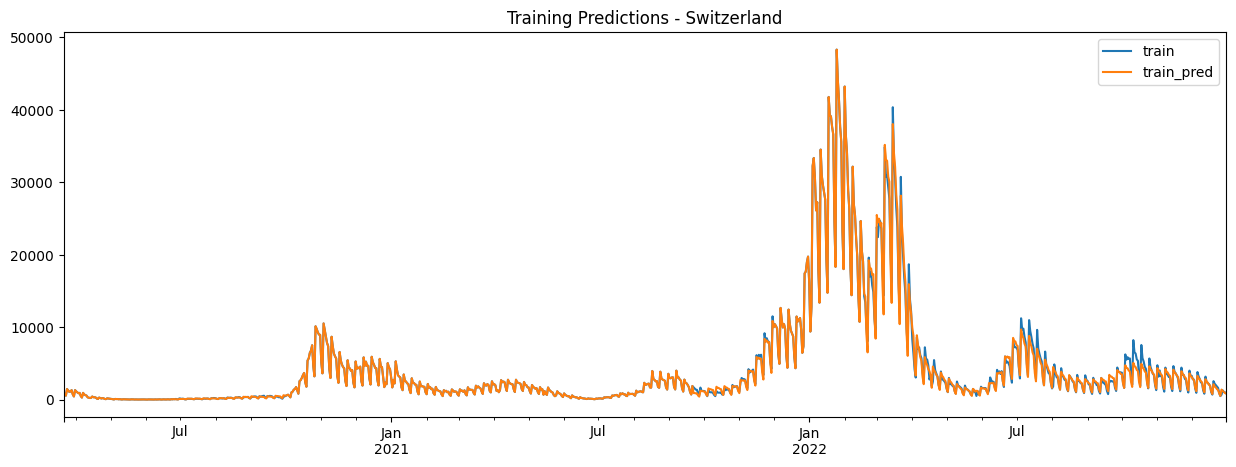

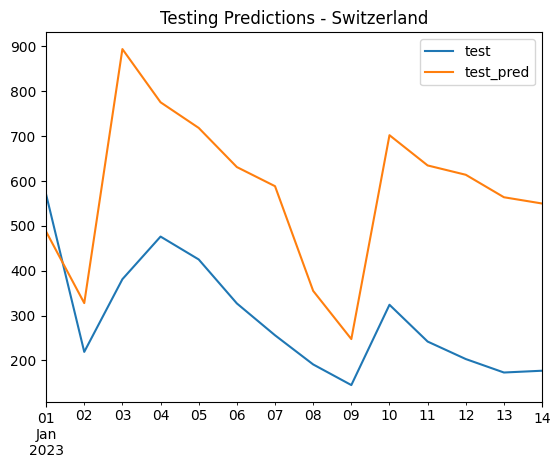

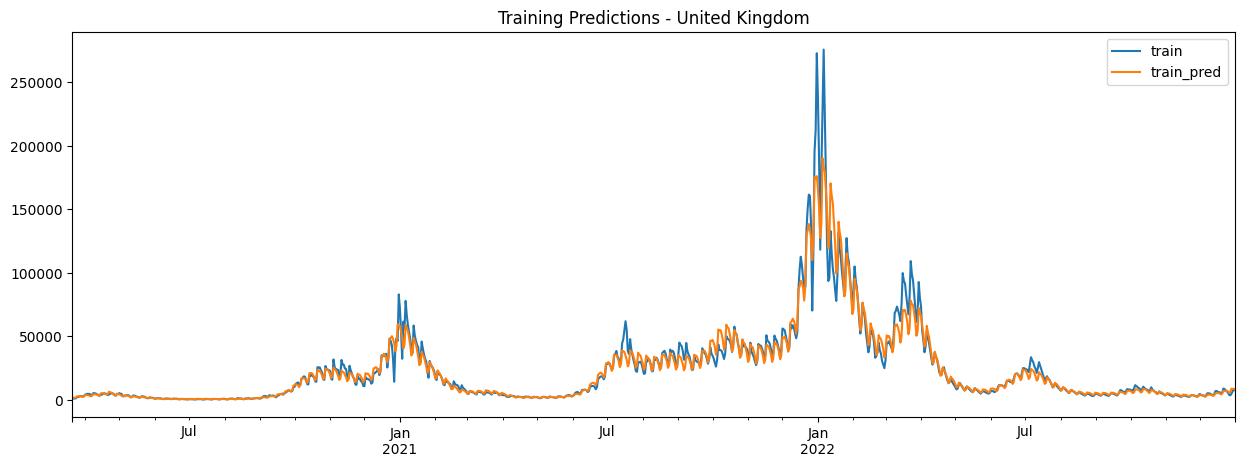

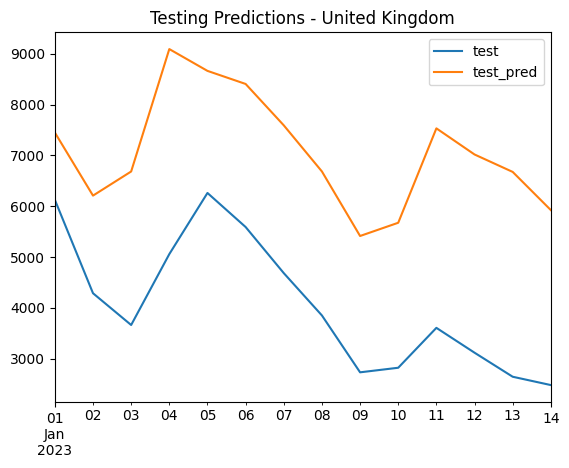

In [ ]:
## applying cv results for Italy
rmse_results_cv = {}
data_clean['date'] = pd.to_datetime(data_clean['date'])
split_date = pd.to_datetime('2023-01-01')

for country in data_clean['location'].unique():
    data_country = data_clean[data_clean['location'] == country]
    data_country = data_country.drop(['location'], axis=1)
    train_country = data_country[data_country['date'] < split_date]
    test_country = data_country[data_country['date'] >= split_date]
    
    country_holidays = globals().get(f'holiday_{country.lower()}')

    # Create and fit the model with the parameters tuned for Italy
    model_country = Prophet(
        holidays=country_holidays,  
        holidays_prior_scale=25,
        seasonality_prior_scale=5,
        changepoint_prior_scale=0.1,
        seasonality_mode='additive'
    )
    model_country.fit(train_country.rename(columns={'date': 'ds', 'new_cases_log': 'y'}))

    # training preds
    train_pred = model_country.predict(train_country.reset_index().rename(columns={'date': 'ds', 'new_cases_log': 'y'})).set_index('ds')
    train_pred['yhat_exp'] = np.exp(train_pred['yhat'])
    pd.concat([train_country.set_index('date')['new_cases'],train_pred['yhat_exp']], axis=1).plot(figsize=(15,5)) 
    plt.title(f'Training Predictions - {country}')
    plt.legend(['train', 'train_pred'])

    # tests preds
    test_pred = model_country.predict(test_country.reset_index().rename(columns={'date': 'ds', 'new_cases_log': 'y'})).set_index('ds')
    test_pred['yhat_exp'] = np.exp(test_pred['yhat'])
    pd.concat([test_country.set_index('date')['new_cases'],test_pred['yhat_exp']], axis=1).plot( )
    plt.title(f'Testing Predictions - {country}')
    plt.legend(['test', 'test_pred'])

    # RMSE for training and testing sets
    train_rmse = np.sqrt(mean_squared_error(train_country['new_cases'], train_pred['yhat_exp']))
    test_rmse = np.sqrt(mean_squared_error(test_country['new_cases'], test_pred['yhat_exp']))
    test_srmse = test_rmse / np.mean(test_country['new_cases']) * 100
    rmse_results_cv[country] = {'train_rmse': train_rmse, 'test_rmse': test_rmse, 'test_srmse': test_srmse}
    print(f"{country} - Train RMSE: {train_rmse}, Test RMSE: {test_rmse}, Test SRMSE: {test_srmse}")

rmse_df_cv = pd.DataFrame(rmse_results_cv).T
print(rmse_df_cv)